## Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models.

## Problem Statement

- The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

- In this project, we will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

- The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.

## Business problem overview

- For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
- It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 
- In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

## Data Understanding
Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

pd.set_option("display.max_rows",200)
pd.set_option("display.max_columns",200)


import imblearn
from imblearn.over_sampling import ADASYN
from collections import Counter

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,auc,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
plt.style.use("classic")
import time

In [2]:
# df = pd.read_csv('creditcard.csv')
# df.head()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
url="/content/drive/MyDrive/creditcard.csv"
df=pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
df.shape

(284807, 31)

In [6]:
# Check the column-wise info of the dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Check the summary for the numeric columns 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#Checking total columns in the dataframe
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Observations


- The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.

- The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.

- The ‘Time’ and ‘Amount’ features are not transformed data.

- There is no missing value in the dataset.

## Exploratory data analysis

### Handling Missing Values

In [9]:
# Checking for the missing value present in each columns
Missing_Count = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([Missing_Count, percent], axis=1, keys=['Missing_Count', 'Percent']).head()

,Missing_Count,Percent
Time,0,0.0
V16,0,0.0
Amount,0,0.0
V28,0,0.0
V27,0,0.0


As we are concluding there are no null values in the dataset

#### Outliers treatment

As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe.

Here we will observe the distribution of our classes

In [11]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(round(normal_share,2),round(fraud_share,2))

99.83 0.17


**Insights**

In this case accuracy score to evaluate classification algorithm will not be correct.Just using accuracy as the evaluation metric will predit every case as `0` Non Fraud and hence it would be wrong.

Checking the class distribution of Frauds and No Frauds

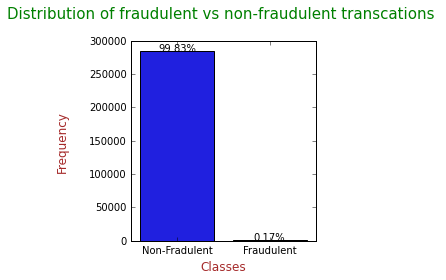

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(5,4))
ax=sns.countplot(df['Class'])
# sns.set_style(style='darkgrid')
LABELS = ['Non-Fradulent','Fraudulent']
plt.title(f"Distribution of fraudulent vs non-fraudulent transcations \n",fontdict={"fontsize":15,"fontweight":5,"color":"Green"})
plt.xticks(range(2), LABELS)
plt.xlabel(f"Classes",fontdict={"fontsize":12,"fontweight":5,"color":"Brown"})
plt.ylabel("Frequency\n",fontdict={"fontsize":12,"fontweight":5,"color":"Brown"})

for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,y=height+0.1,s='{:.2f}%'.format(height/len(df['Class'])*100),ha='center')
plt.tight_layout()
plt.show()

**Insights**

The dataset has very high class imbalance. Only 17% records which are labeld as fradudulent transaction.

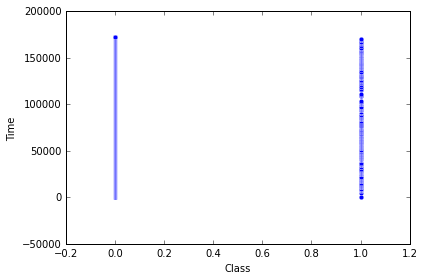

In [13]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df['Class'],df['Time'])
plt.tight_layout()
plt.show()

**Insights**

Here is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

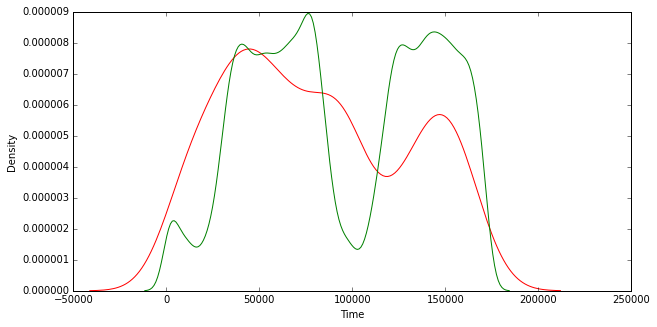

In [14]:
# Dstribution of classes with time
# Fraudulent and non-fraudulent dataframe
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Distribution plot
plt.figure(figsize=(10,5))
ax = sns.distplot(fraud['Time'],label='Fraud',hist=False,color='red')
ax = sns.distplot(non_fraud['Time'],label='Non-Fraud',hist=False,color='green')
plt.show()

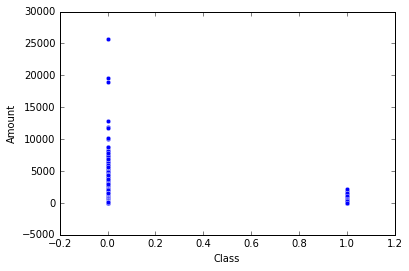

In [15]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df['Class'],df['Amount'])
plt.show()

**Insights**

Here low amount transactions are more likely to be fraudulent than high amount transaction.

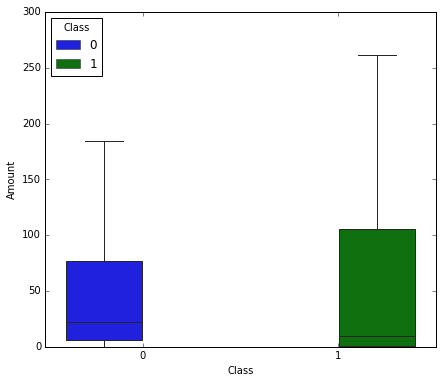

In [16]:
# Box Plot of amount for both classes
plt.figure(figsize = (7, 6))
a=sns.boxplot(x = 'Class', y = 'Amount',hue='Class', data = df, showfliers=False) 
plt.setp(a.get_xticklabels(),rotation=0)
plt.show()

Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  31904  (11.2%)


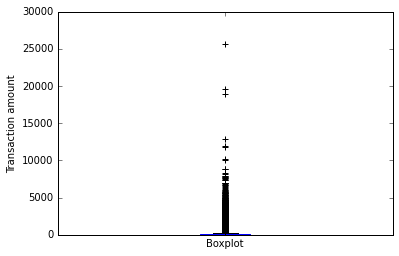

In [17]:
plt.boxplot(df['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
plt.plot()

amount = df[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

**Insights**

We found that the upper bound is 31904 above this range 11.2% datasets 
are outliers,removing these datapoints would be not good idea due 
to loss of large amount of information for our ML model

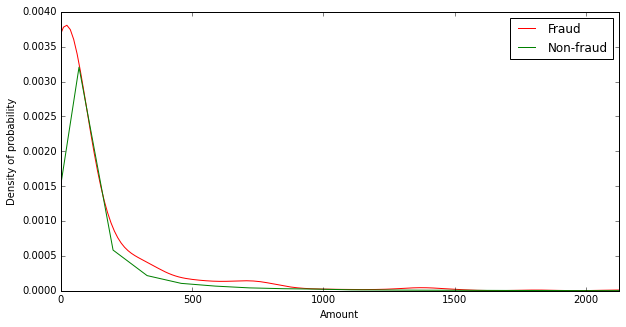

In [18]:
# Dstribution of classes with Amount

# Fraudulent and non-fraudulent dataframe
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Distribution plot
plt.figure(figsize=(10,5))
ax1=sns.distplot(fraud[['Amount']], hist=False, color='red', label='Fraud')
ax2=sns.distplot(non_fraud[['Amount']], hist=False, color='green', label='Non-fraud')
ax1.set_xlim(0, max(df[df['Class']==1]['Amount']))
ax2.set_xlim(0, max(df[df['Class']==1]['Amount']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')
plt.show()

**Insights**

The distribution of amount for Fraud transactions is higher than non-fradualent transactions. 

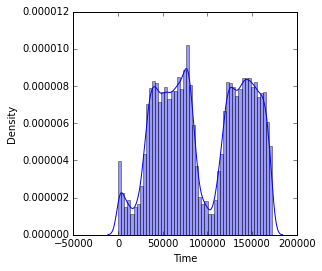

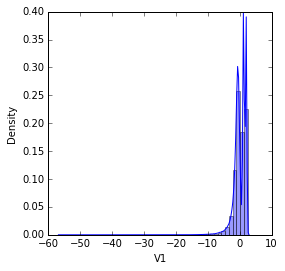

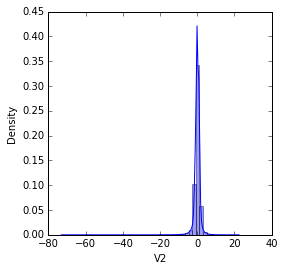

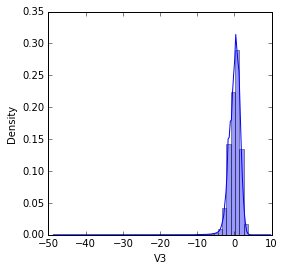

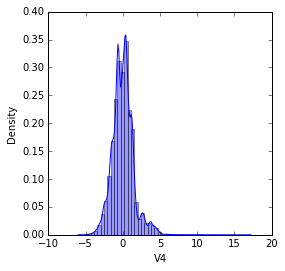

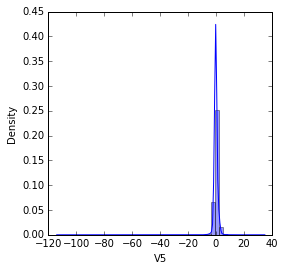

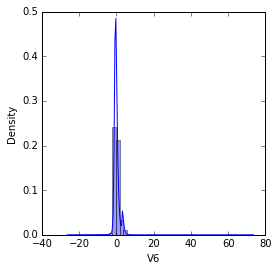

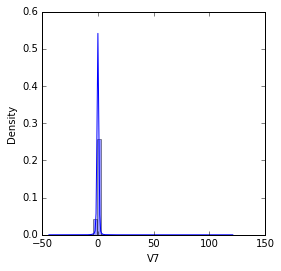

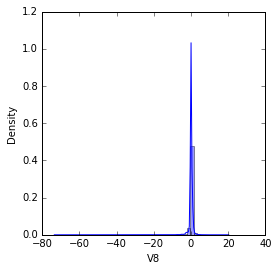

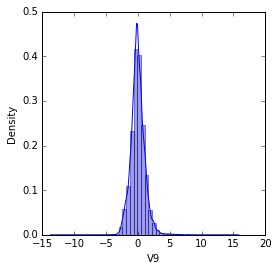

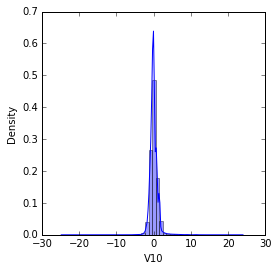

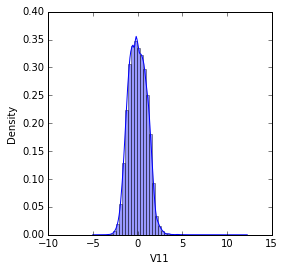

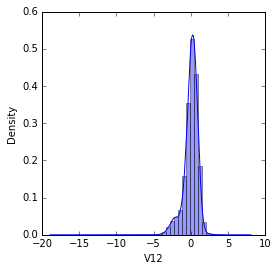

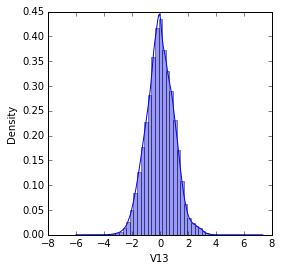

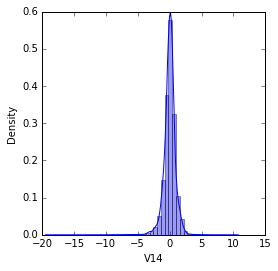

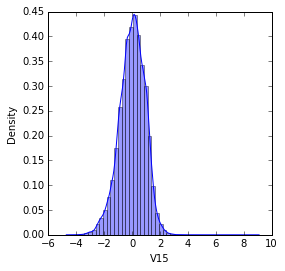

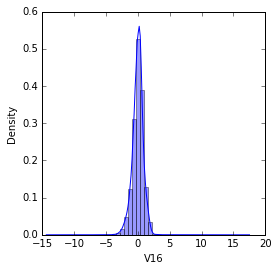

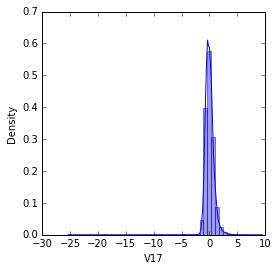

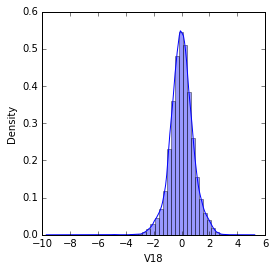

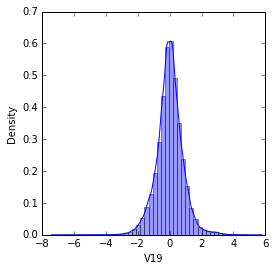

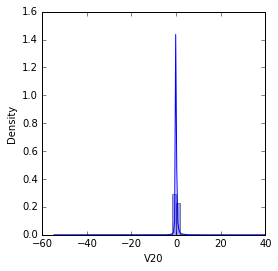

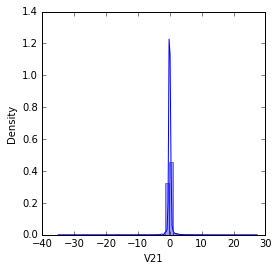

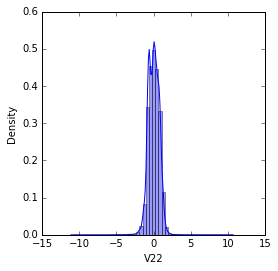

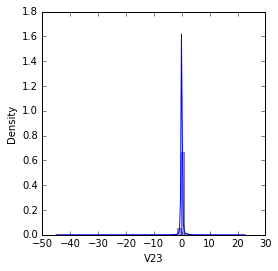

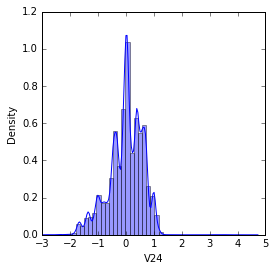

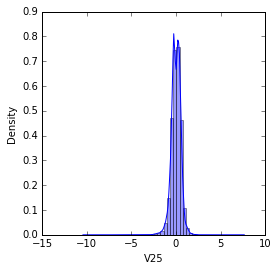

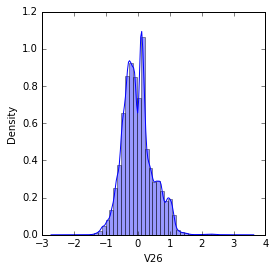

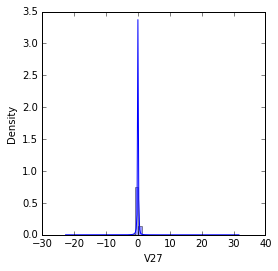

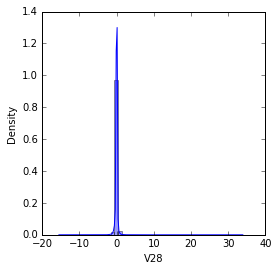

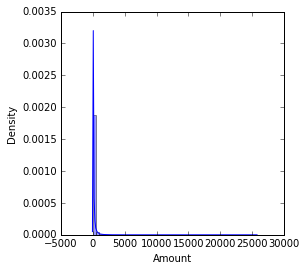

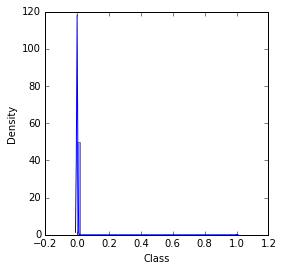

In [19]:
# Distribution of Numerical cloumns
num_col=df.select_dtypes(exclude=['object'])

for c in num_col:
  plt.figure(figsize=(4,4))
  sns.set_style(style=None,rc=None)
  sns.distplot(df[c])
  plt.show();


#### Correlation with target variable

In [20]:
# Correlation of Class variable with other independent variables
cor=df.corr()
cor_target=abs(cor['Class'])

# Checking for top correlated variable which has correlation greater than 20%
top_features=cor_target[cor_target>0.20]
top_features

V10      0.216883
V12      0.260593
V14      0.302544
V17      0.326481
Class    1.000000
Name: Class, dtype: float64

In [21]:
# Correlation for top 5 variable
cor=df[['V10','V12','V14','V17','Class']].corr()
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False

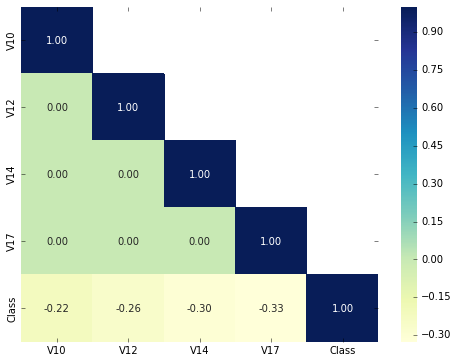

In [22]:
# Heatmap to see correlation between continuous variables
plt.figure(figsize=[8,6])
sns.heatmap(cor,mask=mask, cmap="YlGnBu", annot = True,fmt='.2f')
plt.show()

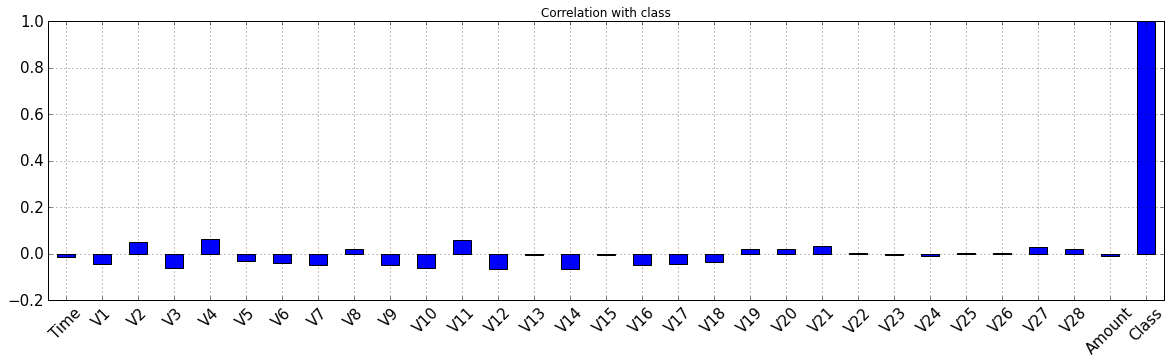

In [23]:
df.corrwith(df.Class, method='spearman').plot.bar(
        figsize = (20, 5), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True, color=['blue'])
plt.show()

**Insights**

We can see above that all features have very low correlation coefficients among each other, and especially low correlation with the 'Class' feature. This was already expected since the data was processed using PCA.

In [24]:
df.sample(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
44382,41921.0,1.504825,-1.325371,-1.192269,-2.471805,0.945322,3.248429,-1.439117,0.737310,-1.989199,1.482905,-0.242234,-1.025505,0.505428,-0.167588,0.754359,-0.072453,0.007391,0.404853,0.115911,-0.127411,-0.245084,-0.543722,-0.033326,0.983639,0.535192,-0.195159,0.025720,0.020668,50.00,0
17352,28648.0,1.282702,-0.645731,0.329568,-0.690694,-0.820180,-0.364004,-0.490393,-0.095548,-0.987032,0.653338,1.137003,0.728517,1.124211,-0.360159,-0.828019,1.032646,0.095850,-1.213804,1.208975,0.247456,0.046703,0.054366,-0.103628,0.059930,0.507458,-0.307848,0.003146,0.013103,61.11,0


Dropping Time column as this feature is not much important the model building.

In [25]:
# Drop unnecessary columns
df.drop('Time',axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(284807, 30)

Before balancing the classes we need to split the dataset into a training set and a testing set.We can only balance the classes after we set some observations aside to be used as a test set,otherwise the models might use part of the test data during the training, which will lead to overfitting.

### Splitting the data into train & test data

In [26]:
y= df['Class']
X=df.drop('Class',axis=1)

In [27]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=.30,stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [28]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


#### Scaling

All variables in the dataset are PCA transformed except Amount, then we need to scale Amount variable only.

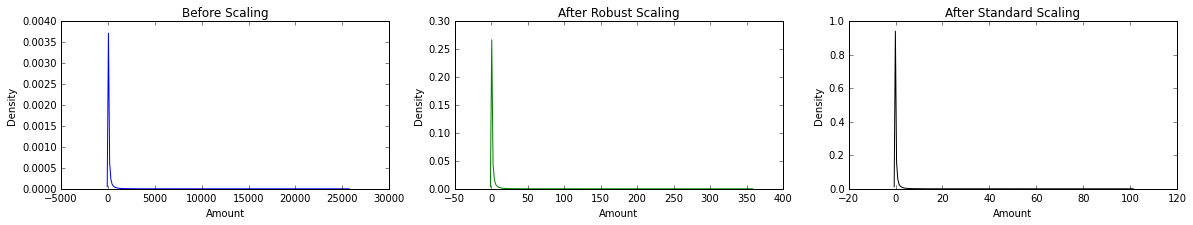

In [29]:
# Comparing Robust and Standard Scaling
from sklearn.preprocessing import RobustScaler
robust=RobustScaler()
ro_df=robust.fit_transform(X_train[['Amount']])
ro_df=pd.DataFrame(ro_df,columns=['Amount'])

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
standard_df=scaler.fit_transform(X_train[['Amount']])
standard_df=pd.DataFrame(standard_df,columns=['Amount'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 3))
ax1.set_title('Before Scaling')
 
sns.kdeplot(X_train['Amount'], ax = ax1, color ='b')
# sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(ro_df['Amount'], ax = ax2, color ='g')
# sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['Amount'], ax = ax3, color ='black')
# sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
plt.show()
 

**Insights**

Here we can use RobustScaler because it is less prone to outliers.


In [30]:
# Applying Robust Scaling to 'Amount' variable
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train['Amount']=scaler.fit_transform(X_train[['Amount']])
X_test['Amount']=scaler.transform(X_test[['Amount']])

In [31]:
X_train.sample(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
114538,-0.718345,0.580781,1.471218,0.352582,0.329369,0.019954,0.867890,0.181837,-0.468543,-0.606939,1.038692,0.910731,-0.537896,0.193931,-1.459678,-0.437741,-0.159689,-0.396255,-0.682023,-0.084928,0.123077,0.359382,0.006842,0.207946,-0.136528,-0.555898,0.131729,0.143325,0.566616
22970,1.458930,-1.047499,0.535635,-1.380263,-1.661108,-0.841005,-1.054346,-0.077100,-2.010683,1.629983,1.282163,-0.503281,-0.340396,0.044793,-0.069906,-0.231223,0.373877,0.474600,-0.027958,-0.367684,-0.156591,-0.132047,0.054774,0.492894,0.305053,-0.234027,0.021501,0.011551,-0.097452


### Plotting the distribution of a variable to handle the Skewness

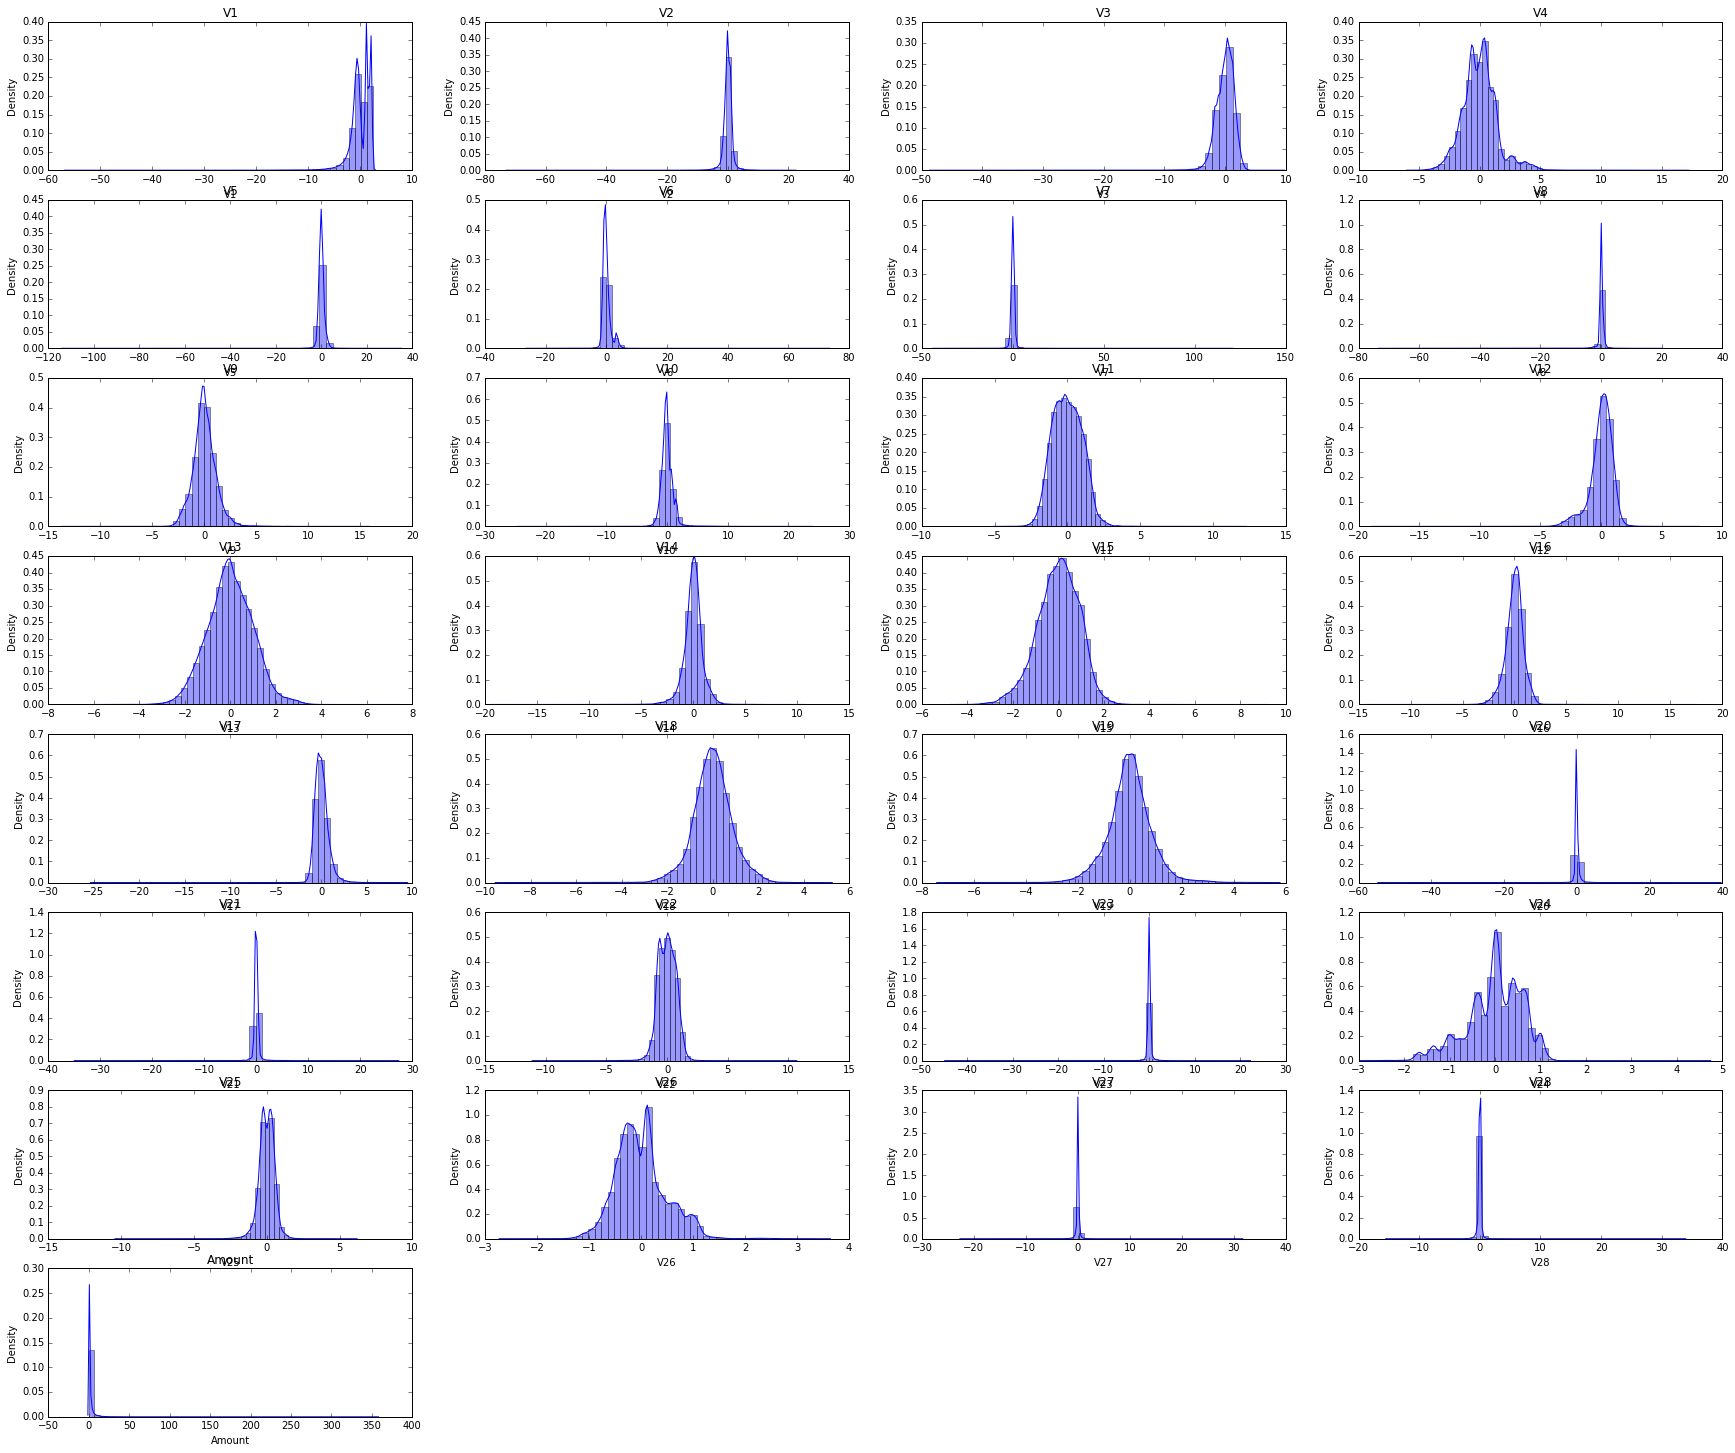

In [32]:
# plot the histogram of a variable from the dataset to see the skewness
col1=X_train.columns
x=0
plt.figure(figsize=(30,25))
for i in col1:
    x=x+1
    plt.subplot(8,4,x)
    sns.distplot(X_train[i])
    plt.title(i)    #plt.title(i+' '+str(X_train[i].skew()))   

**Insights**

Many of features are highly skewed. Hence we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [33]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

skew_col = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
skew_col.set_index("Features", inplace=True)
skew_col

,Skewness
Features,
V1,-3.350182
V2,-4.834316
V3,-2.322368
V4,0.698531
V5,-3.127732
V6,2.025515
V7,3.646023
V8,-8.851522
V9,0.546540


#### Observation
We can see that few features are skewed. We will mitigate skewness to make them normally distributed 

In [34]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = skew_col.loc[(skew_col["Skewness"] > 1) | (skew_col["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']


- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [35]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',copy=False,standardize=True)

# Fitting the power transformer in train data 
X_train[col1]=pt.fit_transform(X_train)

# Transforming the test data
X_test[col1]=pt.transform(X_test)

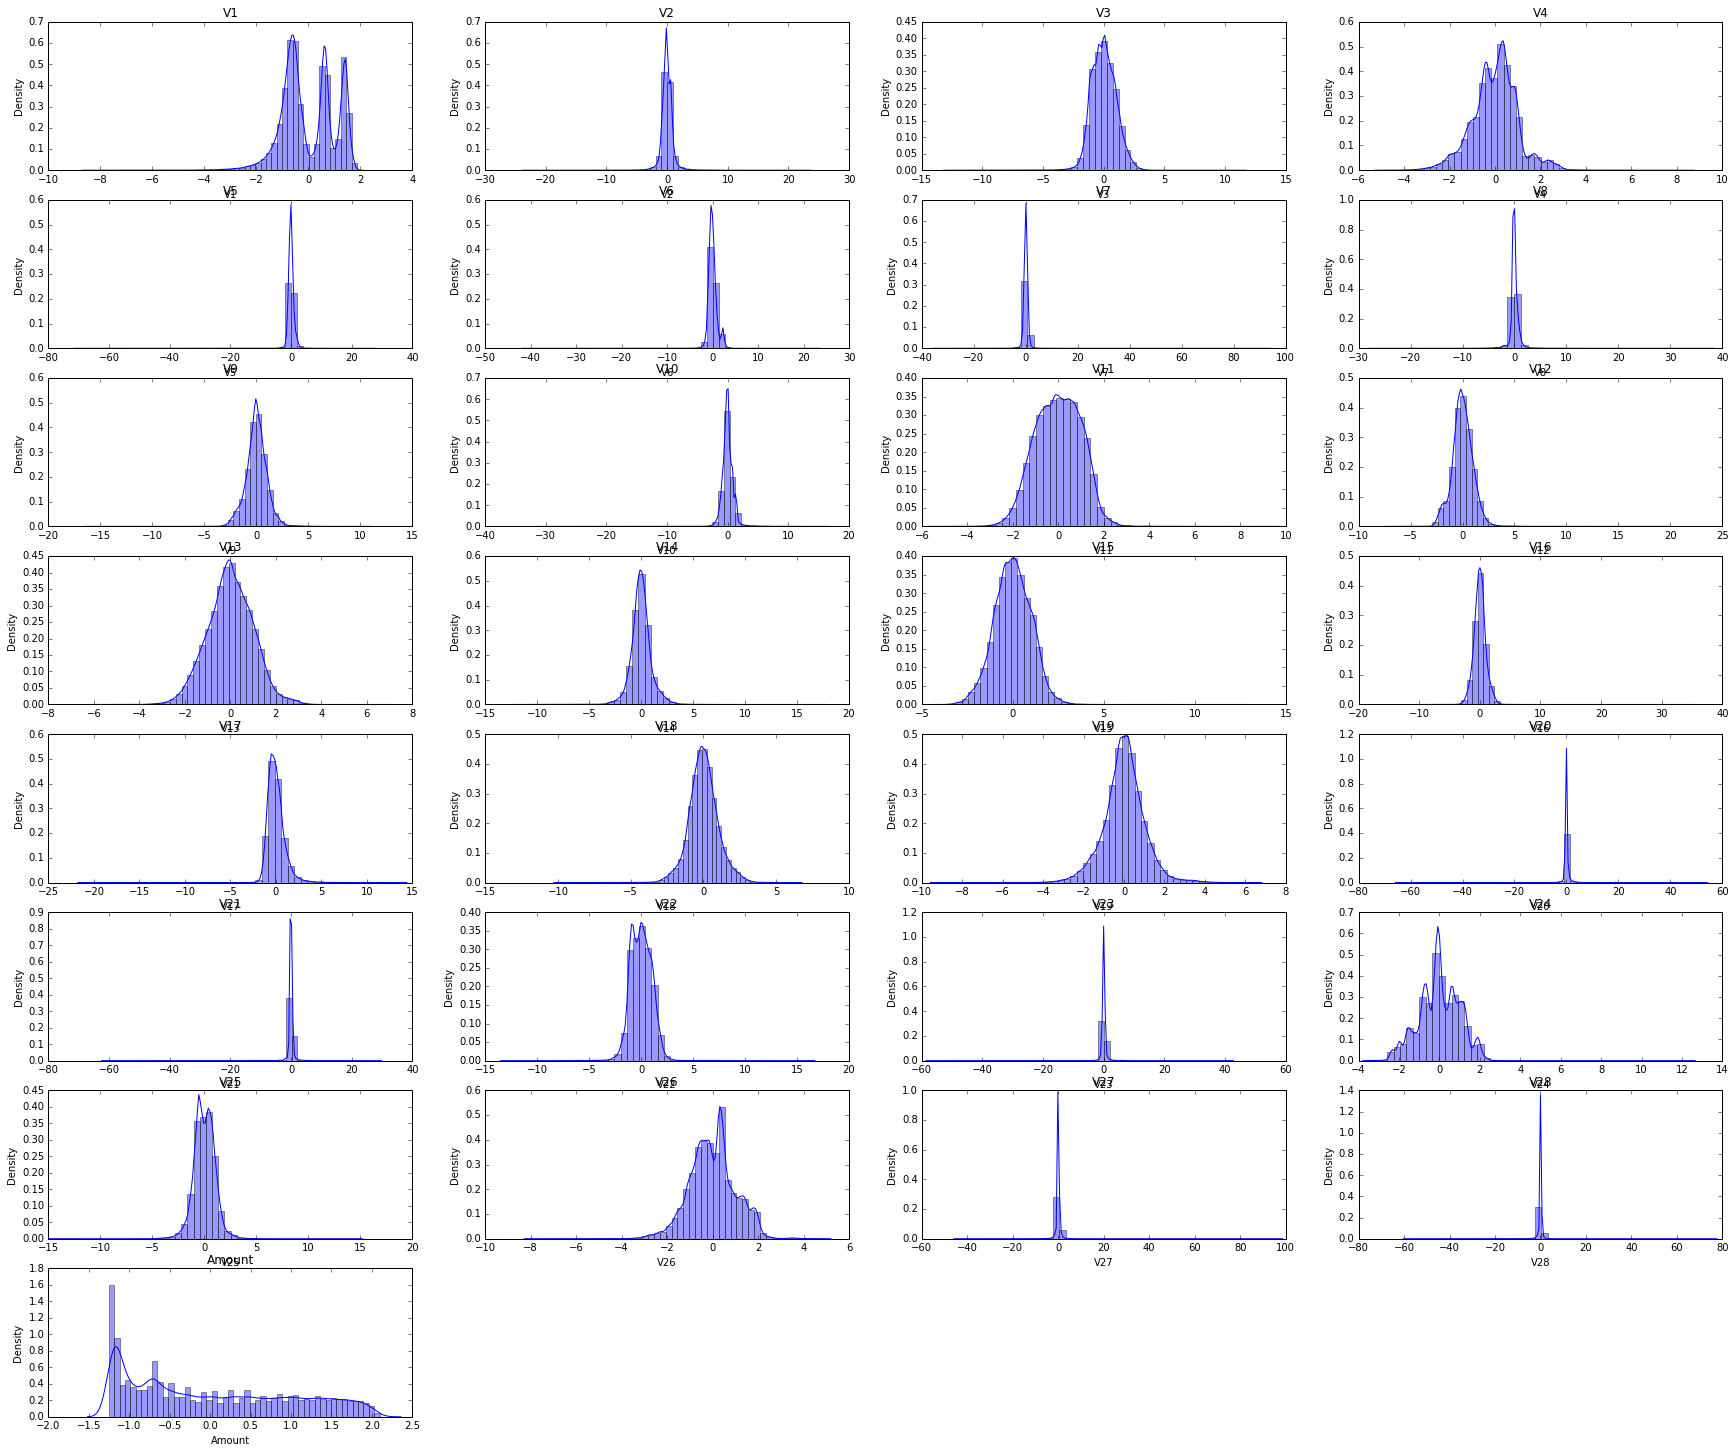

In [36]:
# plot the histogram of a variable from the dataset again to see the result 
col1=X_train.columns
x=0
plt.figure(figsize=(30,25))
for i in col1:
    x=x+1
    plt.subplot(8,4,x)
    sns.distplot(X_train[i])
    plt.title(i)  # plt.title(i +' '+str(X_train[i].skew())

##### Observation
All features are normally distributed now

## Model Building
- Build different models on the imbalanced dataset and see the result

- We are building models on below mentioned algorithms and compare for the best model. 
    - Logistic Regression
    - Decision Tree
    - RandomForest
    - XGBoost
- As we know that these(SVM & KNN) algorithms are computationaly expensive and need more computational resources, that is why we are considering them.  
    

#### Metric selection on imbalance data
We use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

####  Model 1: Logistic Regression with Imbalanced Dataset

In [37]:
# Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,auc,roc_auc_score,roc_curve,f1_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold
initial_time=time.time()

In [38]:
#Training the model on the train data
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [39]:
# prediction on the train data  & test data
y_train_pred=log.predict(X_train)
y_test_pred=log.predict(X_test)

# Predicted probability
y_train_pred_prob = log.predict_proba(X_train)[:, 1]
y_test_pred_prob = log.predict_proba(X_test)[:, 1]

In [40]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Logistic Regression Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.63      0.72       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85277    18]
 [   55    93]]
Logistic Regression Accuracy:  0.999
Precision Score:  0.838
Recall Score:  0.628
F1 Score:  0.718
ROC AUC :  0.966


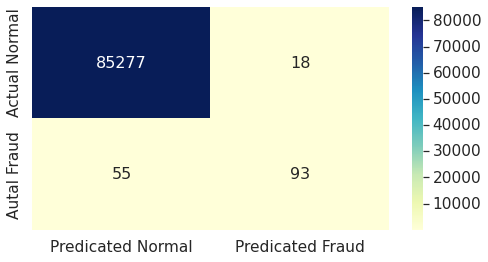

In [41]:
# Confusion Matrix
log_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
log_cm=pd.DataFrame(log_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(log_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

In [42]:
# Function for roc_curve
def plot_roc_curve(fpr,tpr,roc_auc):
    plt.plot(fpr, tpr, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [43]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)

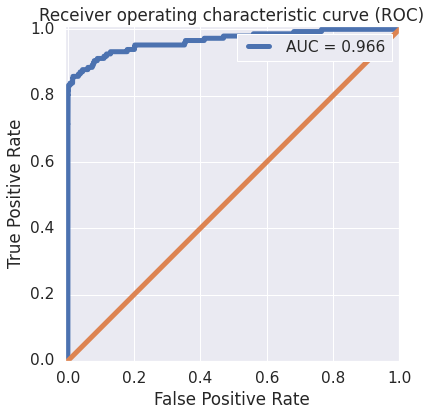

In [44]:
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:

- Logistic Regression Accuracy:  0.999
- Precision Score:  0.838
- Recall Score:  0.628
- F1 Score:  0.718
- ROC AUC :  0.966

In [ ]:
print("Model Building Time : --- %s seconds --- "%(time.time()-initial_time))

Model Building Time : --- 2.3214995861053467 seconds --- 


In [ ]:
# Storing the result
result = {"Model":["Logistic Regression with Imbalanced Data"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = pd.DataFrame(result)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656


#### Model 2 : Logistic Regression on Imbalanced Data with K-Fold and Hyperparameter Tuning

In [ ]:
# Logistic Regression parameters for K-fold cross vaidation
initial_time=time.time()
#perform cross validation
folds=StratifiedKFold(n_splits=4,shuffle=True,random_state=42)
#perform hyperparameter tuning
cv_num=[0.02,0.024,0.025,0.026]
params={'C':cv_num}
log_h=LogisticRegression(max_iter=500)
log_cv=GridSearchCV(estimator=log_h,param_grid=params,scoring='roc_auc',n_jobs=-1,verbose=1,cv=folds)

log_cv.fit(X_train,y_train)

#print the optimum value of hyperparameters
print("Best AUC Score: ",log_cv.best_score_)
print("Best Params: ",log_cv.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best AUC Score:  0.9833534902417193
Best Params:  {'C': 0.024}


In [ ]:
# Passing the best parameteres
log_tuned = log_cv.best_estimator_
log_tuned.fit(X_train,y_train)

LogisticRegression(C=0.024, max_iter=500)

In [ ]:
#print the evaluation result by choosing a evaluation metric
# evaluation on train data
y_train_pred = log_tuned.predict(X_train)
y_train_pred_prob = log_tuned.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))

#print the optimum value of hyperparameters
print("Best hyperparameters: ", log_cv.best_params_)

Train AUC:    	 0.9869
Best hyperparameters:  {'C': 0.024}


In [ ]:
# evaluation on test data
y_test_pred = log_tuned.predict(X_test)
y_test_pred_prob = log_tuned.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9695


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Logistic Regression Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   58    90]]
Logistic Regression Accuracy:  0.999
Precision Score:  0.857
Recall Score:  0.608
F1 Score:  0.711
ROC AUC :  0.969


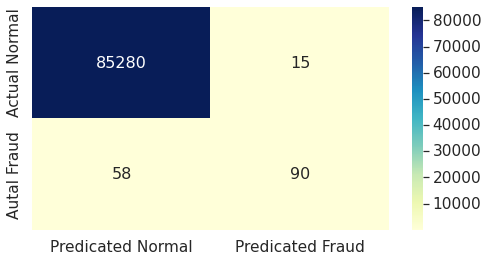

In [ ]:
# Confusion Matrix
log_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
log_cm=pd.DataFrame(log_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(log_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)

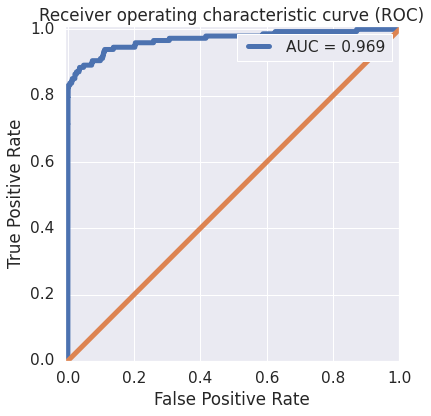

In [ ]:
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Logistic Regression Accuracy:  0.999
- Precision Score:  0.857
- Recall Score:  0.608
- F1 Score:  0.711
- ROC AUC :  0.969

In [ ]:
print("Model Building Time : --- %s seconds --- "%(time.time()-initial_time))

Model Building Time : --- 8.649739742279053 seconds --- 


In [ ]:
# Storing the result
result = {"Model":["Logistic Regression on Imbalanced with K-Fold & Hyperparameter"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695


#### Model 3: Decision Tree with Imbalanced Dataset 

In [ ]:
# Decision Tree Classifier
initial_time=time.time()
from sklearn.tree import DecisionTreeClassifier

#Training the model on the train data
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# prediction on the train data  & test data
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [ ]:
# Predicted probability
y_train_pred_prob = dt.predict_proba(X_train)[:, 1]
y_test_pred_prob = dt.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Decision Tree Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.74      0.77       148

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85269    26]
 [   39   109]]
Decision Tree Accuracy:  0.999
Precision Score:  0.807
Recall Score:  0.736
F1 Score:  0.77
ROC AUC :  0.868


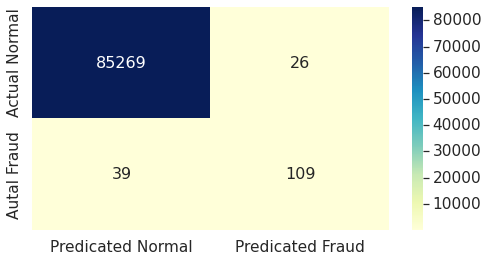

In [ ]:
# Confusion Matrix
dt_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
dt_cm=pd.DataFrame(dt_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(dt_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)

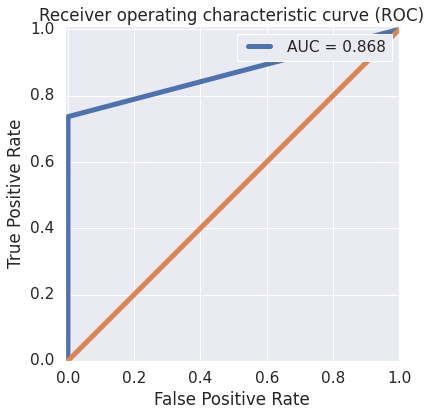

In [ ]:
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Decision Tree Accuracy:  0.999
- Precision Score:  0.807
- Recall Score:  0.736
- F1 Score:  0.77
- ROC AUC :  0.868

In [ ]:
print("Model Building Time : --- %s seconds --- "%(time.time()-initial_time))

Model Building Time : --- 15.39268183708191 seconds --- 


In [ ]:
# Storing the result
result = {"Model":["Decision Tree with Imbalanced Dataset"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681


#### Model 4: Decision Tree  on Imbalanced Data with K-Fold and Hyperparameter Tuning

In [ ]:
# Decision Tree Classifier parameters for K-fold cross vaidation
initial_time=time.time()
#perform cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

dt = DecisionTreeClassifier(random_state=1)
dt_cv = GridSearchCV(estimator=dt, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model
dt_cv.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Best AUC
print("Best AUC: ", dt_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv.best_params_)

Best AUC:  0.9479931314604351
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 50}


In [ ]:
#Trying one more iteration with heperparameter values closer to last best 
params = {"criterion": ['gini'], 'min_samples_leaf': [45,48,50,52,55,58], 'max_depth': [7,8,9]}

dt = DecisionTreeClassifier(random_state=1)
dt_cv = GridSearchCV(estimator=dt, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv.fit(X_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7, 8, 9],
                         'min_samples_leaf': [45, 48, 50, 52, 55, 58]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Best AUC
print("Best AUC: ", dt_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv.best_params_)

Best AUC:  0.9479931314604351
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 50}


In [ ]:
# Passing the best parameteres
dt_tuned = dt_cv.best_estimator_
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=50, random_state=1)

We saw a little bit of improvement after trying more granular hyperparameters in this iteration

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = dt_cv.predict(X_train)
y_train_pred_prob = dt_tuned.predict_proba(X_train)[:, 1]

print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))

#print the optimum value of hyperparameters

print("Best hyperparameters: ", dt_cv.best_params_)

Train AUC:    	 0.9565
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 50}


In [ ]:
# evaluation on test data
y_test_pred = dt_tuned.predict(X_test)
y_test_pred_prob = dt_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.92


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Decision Tree Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.61      0.69       148

    accuracy                           1.00     85443
   macro avg       0.90      0.80      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85272    23]
 [   58    90]]
Decision Tree Accuracy:  0.999
Precision Score:  0.796
Recall Score:  0.608
F1 Score:  0.69
ROC AUC :  0.92


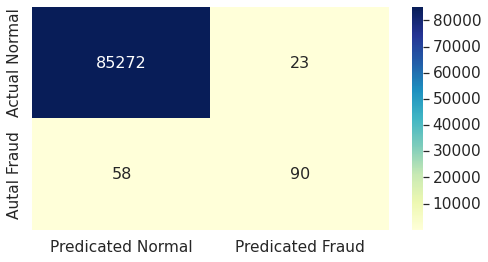

In [ ]:
# Confusion Matrix
dt_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
dt_cm=pd.DataFrame(dt_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(dt_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)

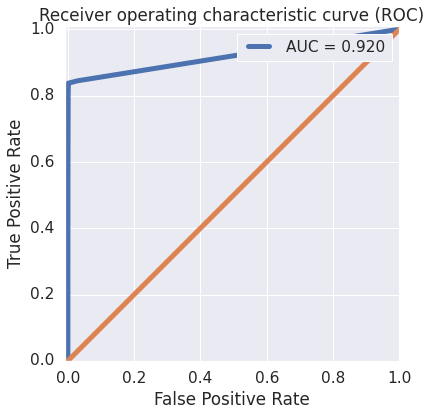

In [ ]:
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Decision Tree Accuracy:  0.999
- Precision Score:  0.796
- Recall Score:  0.608
- F1 Score:  0.69
- ROC AUC :  0.92

In [ ]:
print("Model Building Time : --- %s seconds --- "%(time.time()-initial_time))

Model Building Time : --- 225.4370949268341 seconds --- 


In [ ]:
# Storing the result
result = {"Model":["Decision Tree  on Imbalanced Data with K-Fold and Hyperparameter"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200


### Random Forest

#### Model 5 : Random Forest on Imbalanced Data

In [ ]:
#Initializing Random forest and creating model
initial_time=time.time()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, 
                             random_state=42,
                             criterion='gini',
                             n_estimators=100,
                            verbose=False)

In [ ]:
# Fitting the model on Train data and Predicting on Test data
rf.fit(X_train,y_train)

y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

In [ ]:
# Predicted probability
y_train_pred_prob = rf.predict_proba(X_train)[:, 1]
y_test_pred_prob = rf.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Random Forest Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     5]
 [   35   113]]
Random Forest Accuracy:  1.0
Precision Score:  0.958
Recall Score:  0.764
F1 Score:  0.85
ROC AUC :  0.934


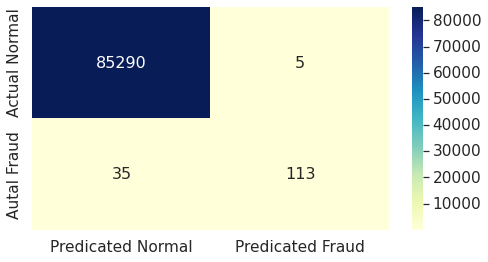

In [ ]:
# Confusion Matrix
rf_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
rf_cm=pd.DataFrame(rf_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

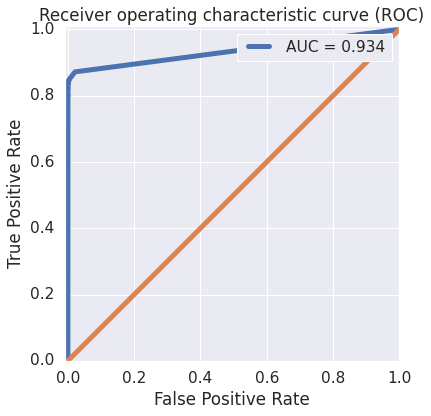

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Random Forest Accuracy:  1.0
- Precision Score:  0.958
- Recall Score:  0.764
- F1 Score:  0.85
- ROC AUC :  0.934

In [ ]:
print("Model Building Time : --- %s seconds --- "%(time.time()-initial_time))

Model Building Time : --- 59.45185923576355 seconds --- 


In [ ]:
# Storing the result
result = {"Model":["Random Forest on Imbalanced Data"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200
4,Random Forest on Imbalanced Data,1.0000,0.9341


#### Hyperparameter Tuning Random Forest

#### Model 6 : Random Forest on Imbalanced Data with K-Fold and Hyperparamater Tuning

In [ ]:
initial_time=time.time()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Random Forest parameters for K-fold cross vaidation
#perform cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [90,100,110], 'max_depth': [7,8,9], 'n_estimators': [40,50,60]}

rf = RandomForestClassifier(n_jobs = -1)
rf_cv = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv.fit(X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7, 8, 9],
                         'min_samples_leaf': [90, 100, 110],
                         'n_estimators': [40, 50, 60]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Best AUC
print("Best AUC: ", rf_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv.best_params_)

Best AUC:  0.9802331716106596
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100, 'n_estimators': 60}


In [ ]:
# Passing the best parameteres
rf_tuned = rf_cv.best_estimator_
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100, n_estimators=60,
                       n_jobs=-1)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = rf_tuned.predict(X_train)
y_train_pred_prob = rf_tuned.predict_proba(X_train)[:, 1]

print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))

#print the optimum value of hyperparameters

print("Best hyperparameters: ", rf_cv.best_params_)

Train AUC:    	 0.993
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100, 'n_estimators': 60}


In [ ]:
# evaluation on test data
y_test_pred = rf_tuned.predict(X_test)
y_test_pred_prob = rf_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9693


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Random Forest Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.56      0.67       148

    accuracy                           1.00     85443
   macro avg       0.91      0.78      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85278    17]
 [   65    83]]
Random Forest Accuracy:  0.999
Precision Score:  0.83
Recall Score:  0.561
F1 Score:  0.669
ROC AUC :  0.969


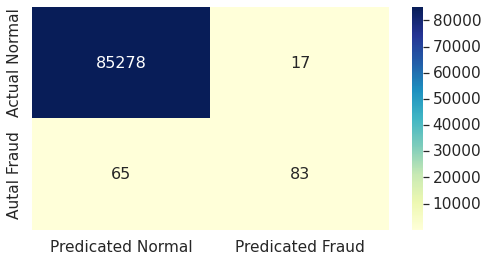

In [ ]:
# Confusion Matrix
rf_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
rf_cm=pd.DataFrame(rf_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

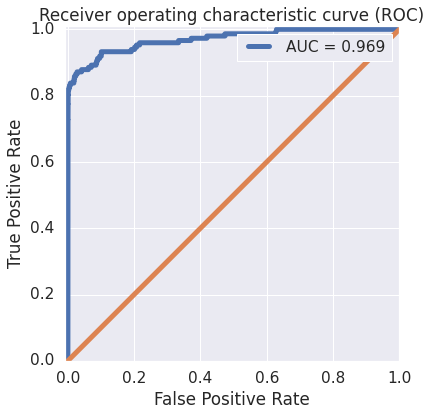

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)

# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Random Forest Accuracy:  0.999
- Precision Score:  0.83
- Recall Score:  0.561
- F1 Score:  0.669
- ROC AUC :  0.969

In [ ]:
print("Model Building Time : --- %s seconds --- "%(time.time()-initial_time))

Model Building Time : --- 1298.250206232071 seconds --- 


In [ ]:
# Storing the result
result = {"Model":["Random Forest on Imbalanced Data with K-Fold and Hyperparamater"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200
4,Random Forest on Imbalanced Data,1.0000,0.9341
5,Random Forest on Imbalanced Data with K-Fold a...,0.9930,0.9693


### XG Boost

#### Model 7 : XG Boost on Imbalanced Data

In [ ]:
initial_time=time.time()
!pip install xgboost

In [ ]:
#Initializing  XG Boost and creating model
import xgboost as xgb
model_xgb = xgb.XGBClassifier()

In [ ]:
# Fitting the model on Train data and Predicting on Test data
model_xgb.fit(X_train,y_train)

# prediction on the train data  & test data
y_train_pred=model_xgb.predict(X_train)
y_test_pred=model_xgb.predict(X_test)

In [ ]:
# Predicted probability
y_train_pred_prob = model_xgb.predict_proba(X_train)[:, 1]
y_test_pred_prob = model_xgb.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("XG Boost Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.76      0.82       148

    accuracy                           1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85282    13]
 [   35   113]]
XG Boost Accuracy:  0.999
Precision Score:  0.897
Recall Score:  0.764
F1 Score:  0.825
ROC AUC :  0.965


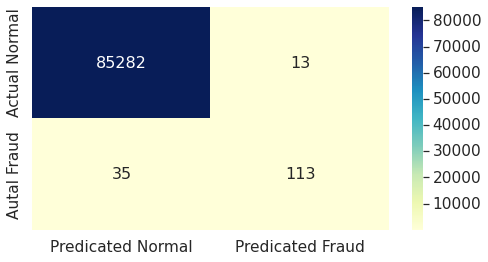

In [ ]:
# Confusion Matrix
xgm_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
xgm_cm=pd.DataFrame(xgm_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(xgm_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

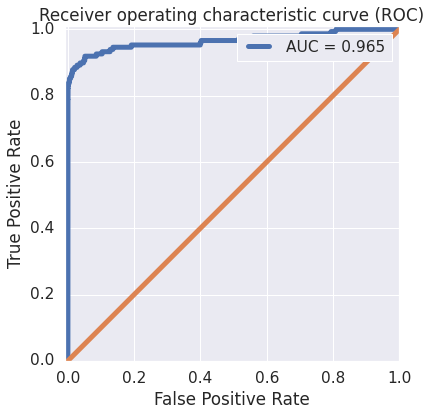

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- XG Boost Accuracy:  0.999
- Precision Score:  0.897
- Recall Score:  0.764
- F1 Score:  0.825
- ROC AUC :  0.965

In [ ]:
print("Model Building Time : --- %s seconds --- "%(time.time()-initial_time))

Model Building Time : --- 47.77006983757019 seconds --- 


In [ ]:
# Storing the result
result = {"Model":["XG Boost on Imbalanced Data"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200
4,Random Forest on Imbalanced Data,1.0000,0.9341
5,Random Forest on Imbalanced Data with K-Fold a...,0.9930,0.9693
6,XG Boost on Imbalanced Data,0.9977,0.9654


#### Hyperparameter Tuning XGB

#### Model 8 : XGB on Imbalanced Data with K-Fold and Hyperparamater Tuning

In [99]:
# XG Boost parameters for K-fold cross vaidation
initial_time=time.time()
#perform cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

#perform hyperparameter tuning
parameters = {'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'subsample': [0.3, 0.5, 0.7],'max_depth':[5,8], 'n_estimators': [50]}
scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True, needs_proba=True, needs_threshold=False) 

xgbm = xgb.XGBClassifier()
xgbm_cv = model_selection.GridSearchCV(estimator=xgbm, param_grid=parameters, n_jobs=-1, cv=folds, scoring=scorer, refit=True)
xgbm_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
                         'max_depth': [5, 8], 'n_estimators': [50],
                         'subsample': [0.3, 0.5, 0.7]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [ ]:
#Best AUC
print("Best AUC: ", xgbm_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", xgbm_cv.best_params_)

Best AUC:  0.9774944904450411
Best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.5}


In [ ]:
# Passing the best parameteres
xgb_tuned = xgbm_cv.best_estimator_
xgb_tuned.fit(X_train,y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.5)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = xgb_tuned.predict(X_train)
y_train_pred_prob = xgb_tuned.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))

#print the optimum value of hyperparameters
print("Best hyperparameters: ", xgbm_cv.best_params_)

Train AUC:    	 1.0
Best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.5}


In [ ]:
# evaluation on test data
y_test_pred = xgb_tuned.predict(X_test)
y_test_pred_prob = xgb_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9619


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("XG Boost Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.77      0.85       148

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85288     7]
 [   34   114]]
XG Boost Accuracy:  1.0
Precision Score:  0.942
Recall Score:  0.77
F1 Score:  0.848
ROC AUC :  0.962


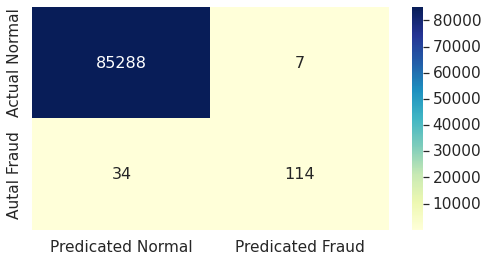

In [ ]:
# Confusion Matrix
xgm_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
xgm_cm=pd.DataFrame(xgm_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(xgm_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

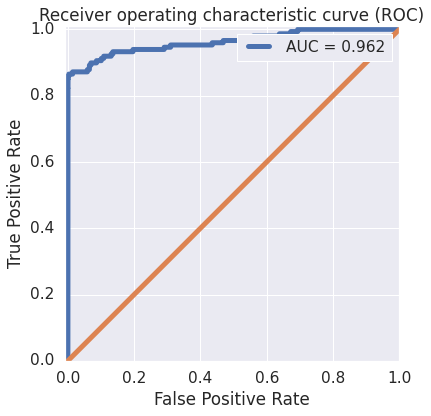

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- XG Boost Accuracy:  1.0
- Precision Score:  0.942
- Recall Score:  0.77
- F1 Score:  0.848
- ROC AUC :  0.962

In [ ]:
print("Model Building Time : --- %s seconds --- "%(time.time()-initial_time))

Model Building Time : --- 1010.7036345005035 seconds --- 


In [ ]:
# Storing the result
result = {"Model":["XGB on Imbalanced Data with K-Fold and Hyperparamater Tuning"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200
4,Random Forest on Imbalanced Data,1.0000,0.9341
5,Random Forest on Imbalanced Data with K-Fold a...,0.9930,0.9693
6,XG Boost on Imbalanced Data,0.9977,0.9654
7,XGB on Imbalanced Data with K-Fold and Hyperpa...,1.0000,0.9619


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [100]:
clf = xgb.XGBClassifier(learning_rate=0.3, subsample=0.5, max_depth=5, n_estimators=50)#initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = clf.predict(X_train)
y_train_pred_prob = clf.predict_proba(X_train)[:, 1]


print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))

# evaluation on test data
y_test_pred = clf.predict(X_test)
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]


print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Train AUC:    	 1.0
Test AUC:    	 0.9619


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

- We can depict from building different models on imbalanced data that XG boost performed best.
- XGBOOST is very resource intensive and taking more time for training.
- Random Forest also performed well. But it is also consume more resources and taking more time for training
- Logistic regression take less time and resources and give good performance result
-Finalizing for imbalanced dataset is XGBOOST with best hyperparameters and showing the results again

Top var = 17
2nd Top var = 14
3rd Top var = 12


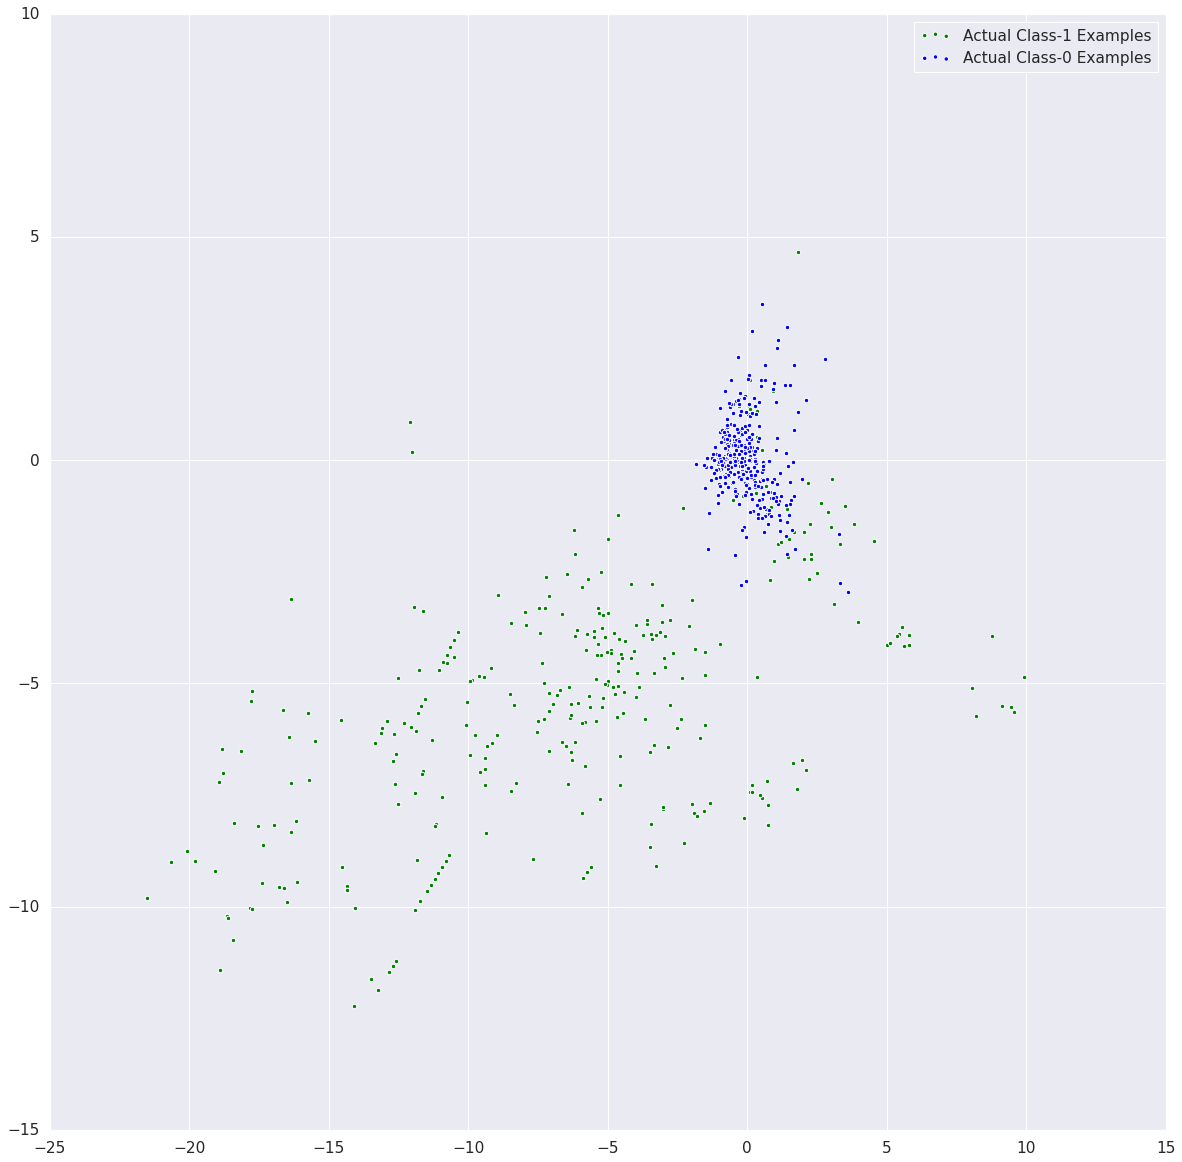

In [101]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
color1="Green"
color2="Blue"
plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples',c=color1)
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples',c=color2)
plt.legend()

Feature: 0, Score: 0.02490
Feature: 1, Score: 0.02995
Feature: 2, Score: 0.02985
Feature: 3, Score: 0.03587
Feature: 4, Score: 0.01694
Feature: 5, Score: 0.02115
Feature: 6, Score: 0.03754
Feature: 7, Score: 0.02903
Feature: 8, Score: 0.02850
Feature: 9, Score: 0.04099
Feature: 10, Score: 0.02742
Feature: 11, Score: 0.04935
Feature: 12, Score: 0.02810
Feature: 13, Score: 0.05402
Feature: 14, Score: 0.02537
Feature: 15, Score: 0.02238
Feature: 16, Score: 0.20757
Feature: 17, Score: 0.02279
Feature: 18, Score: 0.01825
Feature: 19, Score: 0.02186
Feature: 20, Score: 0.02715
Feature: 21, Score: 0.02856
Feature: 22, Score: 0.01580
Feature: 23, Score: 0.02767
Feature: 24, Score: 0.02290
Feature: 25, Score: 0.02762
Feature: 26, Score: 0.02749
Feature: 27, Score: 0.02787
Feature: 28, Score: 0.02310


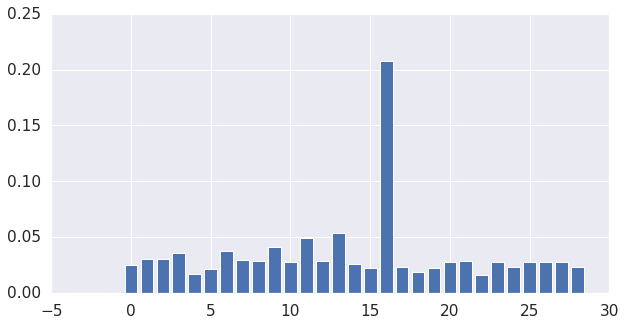

In [ ]:
# Listing all the features with their importance and creating a bar plot

importance = clf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

###  Random Oversampling

In [ ]:
import imblearn 
from imblearn.over_sampling import RandomOverSampler #- import the packages

#Initialize RandomOverSampler
ROS = RandomOverSampler(random_state=42)

#Run RandomOverSampler on Train data to handle imbalance
X_train_ros, y_train_ros = ROS.fit_resample(X_train, y_train)

from collections import Counter

print(sorted(Counter(y_train).items())) #count before Random oversampling
print(sorted(Counter(y_train_ros).items())) #count after Random oversampling

[(0, 199020), (1, 344)]
[(0, 199020), (1, 199020)]


No handles with labels found to put in legend.


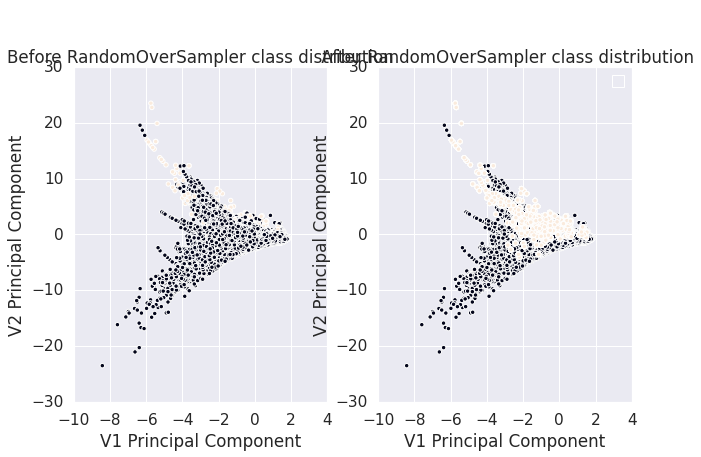

In [ ]:
# scatter plot of examples by class labels before and after Random Oversampling

plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train['V1'], X_train['V2'], c = y_train)
plt.xlabel('V1 Principal Component')
plt.ylabel('V2 Principal Component')
plt.title('Before RandomOverSampler class distribution')
plt.subplot(1, 2, 2)
plt.scatter(X_train_ros['V1'], X_train_ros['V2'], c = y_train_ros)
plt.xlabel('V1 Principal Component')
plt.ylabel('V2 Principal Component')
plt.title('\n\n After RandomOverSampler class distribution')
plt.legend(loc='upper right')
plt.show()


### Model 9 :  Logistic Regression with RandomOverSampler

In [ ]:
# Logistic Regression parameters for K-fold cross vaidation
#perform cross validation 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
c_space = [0.5,1,3,4,4.5,5,5.5,6]
params = {'C': c_space}
lm_ROS = LogisticRegression(max_iter=500)# Tried with default value first but did not converge, manually set max_iter to given value to work
lm_cv_ROS = GridSearchCV(estimator=lm_ROS, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

lm_cv_ROS.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.5, 1, 3, 4, 4.5, 5, 5.5, 6]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Best AUC
print("Best AUC: ", lm_cv_ROS.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", lm_cv_ROS.best_params_)

Best AUC:  0.990309514914711
Best hyperparameters:  {'C': 5}


In [ ]:
# Passing the best parameteres
lm_tuned=lm_cv_ROS.best_estimator_
lm_tuned.fit(X_train_ros,y_train_ros)

LogisticRegression(C=5, max_iter=500)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = lm_tuned.predict(X_train_ros)
y_train_pred_prob = lm_tuned.predict_proba(X_train_ros)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_ros, y_train_pred_prob),4))

#print the optimum value of hyperparameters
print("Best hyperparameters: ", lm_cv_ROS.best_params_)

Train AUC:    	 0.9903
Best hyperparameters:  {'C': 5}


In [ ]:
# evaluation on test data
y_test_pred = lm_tuned.predict(X_test)
y_test_pred_prob = lm_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9701


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Logistic Regression Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83256  2039]
 [   18   130]]
Logistic Regression Accuracy:  0.976
Precision Score:  0.06
Recall Score:  0.878
F1 Score:  0.112
ROC AUC :  0.97


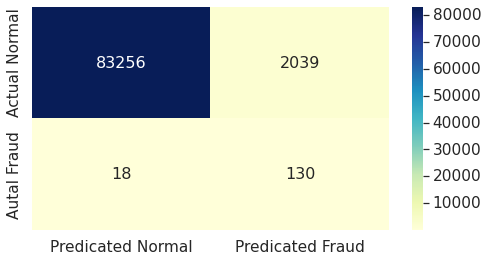

In [ ]:
# Confusion Matrix
log_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
log_cm=pd.DataFrame(log_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(log_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

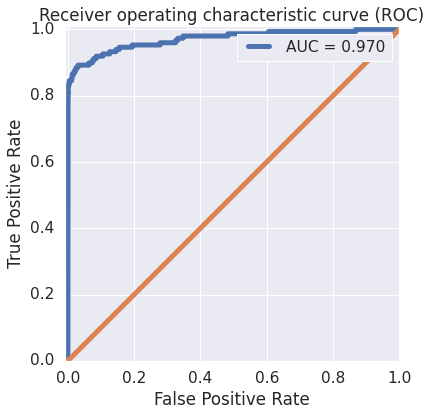

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Logistic Regression Accuracy:  0.976
- Precision Score:  0.06
- Recall Score:  0.878
- F1 Score:  0.112
- ROC AUC :  0.97

In [ ]:
# Storing the result
result = {"Model":["Logistic Regression With RandomOverSampler"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ros, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200
4,Random Forest on Imbalanced Data,1.0000,0.9341
5,Random Forest on Imbalanced Data with K-Fold a...,0.9930,0.9693
6,XG Boost on Imbalanced Data,0.9977,0.9654
7,XGB on Imbalanced Data with K-Fold and Hyperpa...,1.0000,0.9619
8,Logistic Regression With RandomOverSampler,0.9903,0.9701


### Model 10 :  Decision Tree with RandomOverSampler

In [ ]:
# Decision Tree parameters for K-fold cross vaidation
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [5,6,7]}

dt_ROS = DecisionTreeClassifier(random_state=1)
dt_cv_ROS = GridSearchCV(estimator=dt_ROS, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv_ROS.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 6, 7],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Best AUC
print("Best AUC: ", dt_cv_ROS.best_score_)
#Best hyperparameters
print("Best hyperparameters: ", dt_cv_ROS.best_params_)

Best AUC:  0.9993010628852556
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 50}


In [ ]:
# Passing the best parameteres
dt_tuned = dt_cv_ROS.best_estimator_
dt_tuned.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=1)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = dt_tuned.predict(X_train_ros)
y_train_pred_prob = dt_tuned.predict_proba(X_train_ros)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_ros, y_train_pred_prob),4))

Train AUC:    	 0.9994


In [ ]:
#print the optimum value of hyperparameters

print("Best hyperparameters: ", dt_cv_ROS.best_params_)

# evaluation on test data
y_test_pred = dt_tuned.predict(X_test)
y_test_pred_prob = dt_tuned.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 50}
Test AUC:    	 0.9092


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Decision Tree Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.10      0.81      0.18       148

    accuracy                           0.99     85443
   macro avg       0.55      0.90      0.59     85443
weighted avg       1.00      0.99      0.99     85443

Confusion matrix:
 [[84251  1044]
 [   28   120]]
Decision Tree Accuracy:  0.987
Precision Score:  0.103
Recall Score:  0.811
F1 Score:  0.183
ROC AUC :  0.909


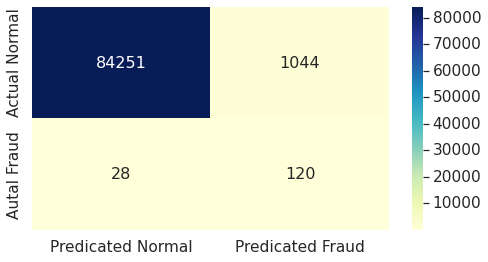

In [ ]:
# Confusion Matrix
dt_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
dt_cm=pd.DataFrame(dt_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(dt_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

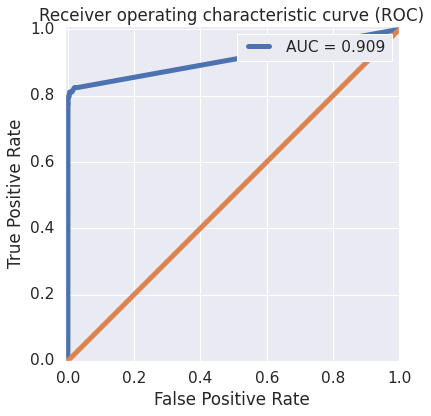

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Decision Tree Accuracy:  0.987
- Precision Score:  0.103
- Recall Score:  0.811
- F1 Score:  0.183
- ROC AUC :  0.909

In [ ]:
# Storing the result
result = {"Model":[" Decision Tree with RandomOverSampler"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ros, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200
4,Random Forest on Imbalanced Data,1.0000,0.9341
5,Random Forest on Imbalanced Data with K-Fold a...,0.9930,0.9693
6,XG Boost on Imbalanced Data,0.9977,0.9654
7,XGB on Imbalanced Data with K-Fold and Hyperpa...,1.0000,0.9619
8,Logistic Regression With RandomOverSampler,0.9903,0.9701
9,Decision Tree with RandomOverSampler,0.9994,0.9092


### Model 11: Random Forest with RandomOverSampler

In [ ]:
# Random Forest parameters for K-fold cross vaidation
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50, 80] }

rf_ROS = RandomForestClassifier(n_jobs = -1)
rf_cv_ROS = GridSearchCV(estimator=rf_ROS, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv_ROS.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'n_estimators': [50, 80]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Best AUC
print("Best AUC: ", rf_cv_ROS.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv_ROS.best_params_)

Best AUC:  0.9998770660741705
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'n_estimators': 50}


In [ ]:
# Passing the best parameteres
rf_tuned = rf_cv_ROS.best_estimator_
rf_tuned.fit(X_train_ros,y_train_ros)

RandomForestClassifier(max_depth=8, min_samples_leaf=20, n_estimators=50,
                       n_jobs=-1)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = rf_tuned.predict(X_train_ros)
y_train_pred_prob = rf_tuned.predict_proba(X_train_ros)[:, 1]

print("Train AUC:    \t", round(roc_auc_score(y_train_ros, y_train_pred_prob),4))

Train AUC:    	 0.9999


In [ ]:
#print the optimum value of hyperparameters

print("Best hyperparameters: ", rf_cv_ROS.best_params_)

# evaluation on test data
y_test_pred= rf_tuned.predict(X_test)
y_test_pred_prob = rf_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'n_estimators': 50}
Test AUC:    	 0.9717


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Random Forest Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.58      0.82      0.68       148

    accuracy                           1.00     85443
   macro avg       0.79      0.91      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85209    86]
 [   27   121]]
Random Forest Accuracy:  0.999
Precision Score:  0.585
Recall Score:  0.818
F1 Score:  0.682
ROC AUC :  0.972


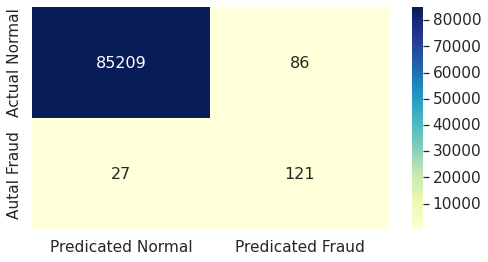

In [ ]:
# Confusion Matrix
rf_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
rf_cm=pd.DataFrame(rf_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

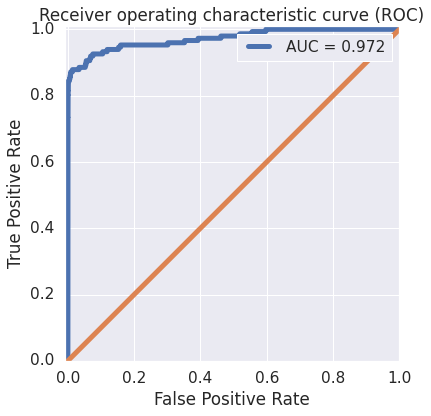

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Random Forest Accuracy:  0.999
- Precision Score:  0.585
- Recall Score:  0.818
- F1 Score:  0.682
- ROC AUC :  0.972

In [ ]:
# Storing the result
result = {"Model":["Random Forest with RandomOverSampler"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ros, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200
4,Random Forest on Imbalanced Data,1.0000,0.9341
5,Random Forest on Imbalanced Data with K-Fold a...,0.9930,0.9693
6,XG Boost on Imbalanced Data,0.9977,0.9654
7,XGB on Imbalanced Data with K-Fold and Hyperpa...,1.0000,0.9619
8,Logistic Regression With RandomOverSampler,0.9903,0.9701
9,Decision Tree with RandomOverSampler,0.9994,0.9092


### Model 12: XG Boost with RandomOverSampler

In [ ]:
# XG Boost parameters for K-fold cross vaidation
#perform cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'subsample': [0.3, 0.5, 0.7],'max_depth':[5,8], 'n_estimators': [50]}

xg_ROS = xgb.XGBClassifier(n_jobs = -1)
xg_cv_ROS = GridSearchCV(estimator=xg_ROS, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
xg_cv_ROS.fit(X_train_ros, y_train_ros)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=XGBClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
                         'max_depth': [5, 8], 'n_estimators': [50],
                         'subsample': [0.3, 0.5, 0.7]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Best AUC
print("Best AUC: ", xg_cv_ROS.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", xg_cv_ROS.best_params_)

Best AUC:  0.9999917894335848
Best hyperparameters:  {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.7}


In [ ]:
# Passing the best parameteres
xg_tuned = xg_cv_ROS.best_estimator_
xg_tuned.fit(X_train_ros,y_train_ros)

XGBClassifier(learning_rate=0.5, max_depth=8, n_estimators=50, n_jobs=-1,
              subsample=0.7)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = xg_tuned.predict(X_train_ros)
y_train_pred_prob = xg_tuned.predict_proba(X_train_ros)[:, 1]

print("Train AUC:    \t", round(roc_auc_score(y_train_ros, y_train_pred_prob),4))

Train AUC:    	 1.0


In [ ]:
#print the optimum value of hyperparameters

print("Best hyperparameters: ", rf_cv_ROS.best_params_)

# evaluation on test data
y_test_pred= xg_tuned.predict(X_test)
y_test_pred_prob = xg_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'n_estimators': 50}
Test AUC:    	 0.9727


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("XG Boost Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.80      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85277    18]
 [   30   118]]
XG Boost Accuracy:  0.999
Precision Score:  0.868
Recall Score:  0.797
F1 Score:  0.831
ROC AUC :  0.973


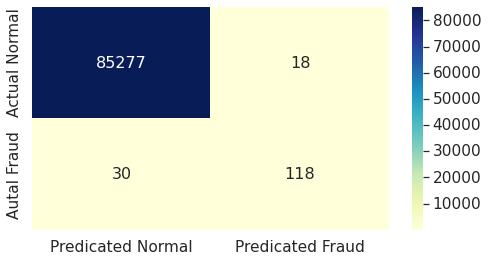

In [ ]:
# Confusion Matrix
xg_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
xg_cm=pd.DataFrame(xg_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(xg_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

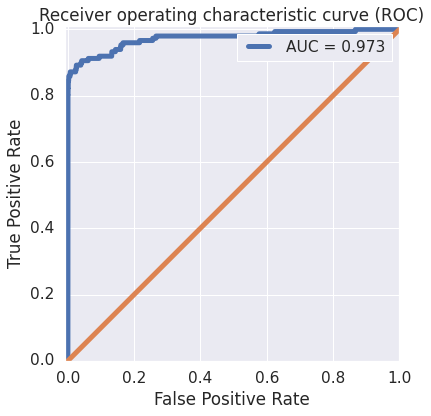

In [ ]:

# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- XG Boost Accuracy:  0.999
- Precision Score:  0.868
- Recall Score:  0.797
- F1 Score:  0.831
- ROC AUC :  0.973

In [ ]:
# Storing the result
result = {"Model":["XG Boost with RandomOverSampler"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ros, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200
4,Random Forest on Imbalanced Data,1.0000,0.9341
5,Random Forest on Imbalanced Data with K-Fold a...,0.9930,0.9693
6,XG Boost on Imbalanced Data,0.9977,0.9654
7,XGB on Imbalanced Data with K-Fold and Hyperpa...,1.0000,0.9619
8,Logistic Regression With RandomOverSampler,0.9903,0.9701
9,Decision Tree with RandomOverSampler,0.9994,0.9092


### SMOTE

In [66]:
import imblearn 
from imblearn.over_sampling import SMOTE #- import the packages

#Initialize SMOTE
sm = SMOTE(random_state=42)

#Run RandomOverSampler on Train data to handle imbalance
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

from collections import Counter

print(sorted(Counter(y_train).items())) #count before Random oversampling
print(sorted(Counter(y_train_sm).items())) #count after Random oversampling

[(0, 199020), (1, 344)]
[(0, 199020), (1, 199020)]


No handles with labels found to put in legend.


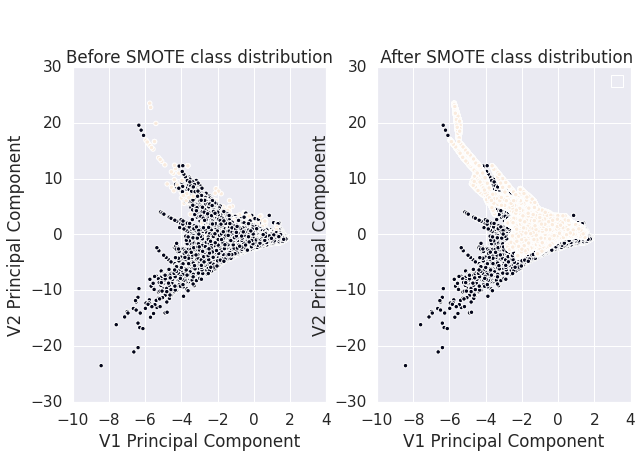

In [ ]:
# scatter plot of examples by class labels before and after SMOTE

plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train['V1'], X_train['V2'], c = y_train)
plt.xlabel('V1 Principal Component')
plt.ylabel('V2 Principal Component')
plt.title('Before SMOTE class distribution')
plt.subplot(1, 2, 2)
plt.scatter(X_train_sm['V1'], X_train_sm['V2'], c = y_train_sm)
plt.xlabel('V1 Principal Component')
plt.ylabel('V2 Principal Component')
plt.title('\n\n After SMOTE class distribution')
plt.legend(loc='upper right')
plt.show()

###  Model Building
### Model 13: Logistic Regression with SMOTE

In [ ]:
# Logistic Regression parameters for K-fold cross vaidation
#perform cross validation 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
c_space = [0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]
params = {'C': c_space}
lm_smote = LogisticRegression(max_iter=500)# Tried with default value first but did not converge, manually set max_iter to given value to work
lm_cv_smote = GridSearchCV(estimator=lm_smote, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

lm_cv_smote.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Best AUC
print("Best AUC: ", lm_cv_smote.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", lm_cv_smote.best_params_)

Best AUC:  0.9925549202245663
Best hyperparameters:  {'C': 5}


In [ ]:
# Passing the best parameteres
lm_tuned = lm_cv_smote.best_estimator_
lm_tuned.fit(X_train_sm,y_train_sm)

LogisticRegression(C=5, max_iter=500)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = lm_tuned.predict(X_train_sm)
y_train_pred_prob = lm_tuned.predict_proba(X_train_sm)[:, 1]

print("Train AUC:    \t", round(roc_auc_score(y_train_sm, y_train_pred_prob),4))

Train AUC:    	 0.9926


In [ ]:
#print the optimum value of hyperparameters

print("Best hyperparameters: ", lm_cv_smote.best_params_)

# evaluation on test data
y_test_pred = lm_tuned.predict(X_test)
y_test_pred_prob = lm_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Best hyperparameters:  {'C': 5}
Test AUC:    	 0.9682


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Logistic Regression Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Confusion matrix:
 [[83162  2133]
 [   18   130]]
Logistic Regression Accuracy:  0.975
Precision Score:  0.057
Recall Score:  0.878
F1 Score:  0.108
ROC AUC :  0.968


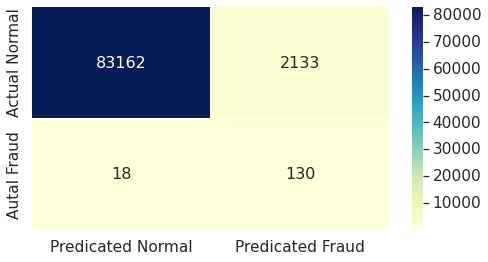

In [ ]:
# Confusion Matrix
log_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
log_cm=pd.DataFrame(log_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(log_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

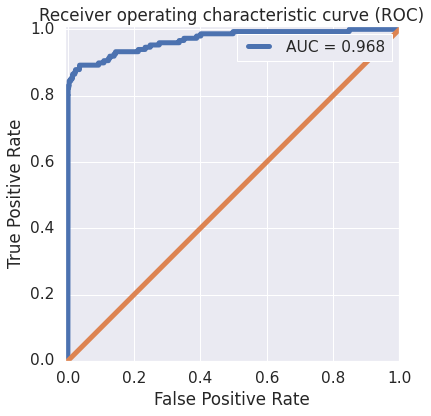

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Logistic Regression Accuracy:  0.975
- Precision Score:  0.057
- Recall Score:  0.878
- F1 Score:  0.108
- ROC AUC :  0.968

In [ ]:
# Storing the result
result = {"Model":["Logistic Regression With SMOTE"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_sm, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200
4,Random Forest on Imbalanced Data,1.0000,0.9341
5,Random Forest on Imbalanced Data with K-Fold a...,0.9930,0.9693
6,XG Boost on Imbalanced Data,0.9977,0.9654
7,XGB on Imbalanced Data with K-Fold and Hyperpa...,1.0000,0.9619
8,Logistic Regression With RandomOverSampler,0.9903,0.9701
9,Decision Tree with RandomOverSampler,0.9994,0.9092


### Model 14: Decision Tree with SMOTE

In [ ]:
# Decision Tree parameters for K-fold cross vaidation
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

dt_smote = DecisionTreeClassifier(random_state=1)
dt_cv_smote = GridSearchCV(estimator=dt_smote, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv_smote.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Best AUC
print("Best AUC: ", dt_cv_smote.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv_smote.best_params_)

Best AUC:  0.9974312408992183
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100}


In [ ]:
# Passing the best parameteres
dt_tuned = dt_cv_smote.best_estimator_
dt_tuned.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=100, random_state=1)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = dt_tuned.predict(X_train_sm)
y_train_pred_prob = dt_tuned.predict_proba(X_train_sm)[:, 1]

print("Train AUC:    \t", round(roc_auc_score(y_train_sm, y_train_pred_prob),4))

Train AUC:    	 0.9978


In [ ]:
#print the optimum value of hyperparameters

print("Best hyperparameters: ", dt_cv_smote.best_params_)

# evaluation on test data
y_test_pred = dt_tuned.predict(X_test)
y_test_pred_prob = dt_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100}
Test AUC:    	 0.9308


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Decision Tree Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.86      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83862  1433]
 [   21   127]]
Decision Tree Accuracy:  0.983
Precision Score:  0.081
Recall Score:  0.858
F1 Score:  0.149
ROC AUC :  0.931


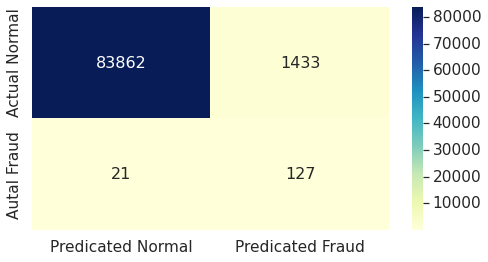

In [ ]:
# Confusion Matrix
dt_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
dt_cm=pd.DataFrame(dt_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(dt_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

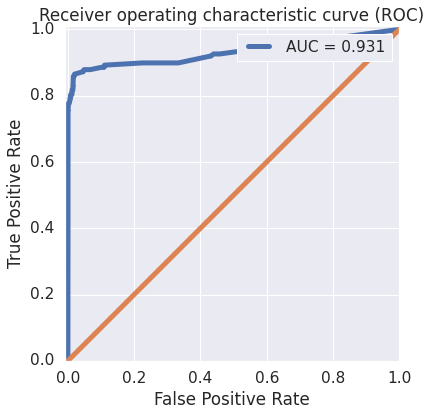

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Decision Tree Accuracy:  0.983
- Precision Score:  0.081
- Recall Score:  0.858
- F1 Score:  0.149
- ROC AUC :  0.931

In [ ]:
# Storing the result
result = {"Model":["Decision Tree with SMOTE"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_sm, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df



,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200
4,Random Forest on Imbalanced Data,1.0000,0.9341
5,Random Forest on Imbalanced Data with K-Fold a...,0.9930,0.9693
6,XG Boost on Imbalanced Data,0.9977,0.9654
7,XGB on Imbalanced Data with K-Fold and Hyperpa...,1.0000,0.9619
8,Logistic Regression With RandomOverSampler,0.9903,0.9701
9,Decision Tree with RandomOverSampler,0.9994,0.9092


### Model 15: Random Forest with SMOTE

In [ ]:
# Random Forest parameters for K-fold cross vaidation
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50,80]}

rf_smote = RandomForestClassifier(n_jobs = -1)
rf_cv_smote = GridSearchCV(estimator=rf_smote, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv_smote.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [50, 80]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Best AUC
print("Best AUC: ", rf_cv_smote.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv_smote.best_params_)

Best AUC:  0.9990442707377898
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 80}


In [ ]:
# Passing the best parameteres
rf_tuned = rf_cv_smote.best_estimator_
rf_tuned.fit(X_train_sm,y_train_sm)

RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=80,
                       n_jobs=-1)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = rf_tuned.predict(X_train_sm)
y_train_pred_prob = rf_tuned.predict_proba(X_train_sm)[:, 1]

print("Train AUC:    \t", round(roc_auc_score(y_train_sm, y_train_pred_prob),4))

#print the optimum value of hyperparameters

print("Best hyperparameters: ", rf_cv_smote.best_params_)

# evaluation on test data
y_test_pred = rf_tuned.predict(X_test)
y_test_pred_prob = rf_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Train AUC:    	 0.999
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 80}
Test AUC:    	 0.9701


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Random Forest Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.31      0.84      0.45       148

    accuracy                           1.00     85443
   macro avg       0.66      0.92      0.73     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85020   275]
 [   24   124]]
Random Forest Accuracy:  0.997
Precision Score:  0.311
Recall Score:  0.838
F1 Score:  0.453
ROC AUC :  0.97


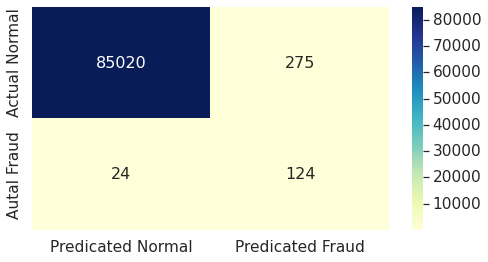

In [ ]:
# Confusion Matrix
rf_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
rf_cm=pd.DataFrame(rf_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

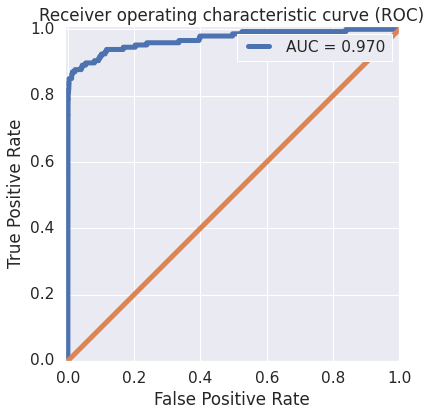

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Random Forest Accuracy:  0.997
- Precision Score:  0.311
- Recall Score:  0.838
- F1 Score:  0.453
- ROC AUC :  0.97

In [ ]:
# Storing the result
result = {"Model":["Random Forest with SMOTE"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_sm, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression with Imbalanced Data,0.9858,0.9656
1,Logistic Regression on Imbalanced with K-Fold ...,0.9869,0.9695
2,Decision Tree with Imbalanced Dataset,1.0000,0.8681
3,Decision Tree on Imbalanced Data with K-Fold ...,0.9565,0.9200
4,Random Forest on Imbalanced Data,1.0000,0.9341
5,Random Forest on Imbalanced Data with K-Fold a...,0.9930,0.9693
6,XG Boost on Imbalanced Data,0.9977,0.9654
7,XGB on Imbalanced Data with K-Fold and Hyperpa...,1.0000,0.9619
8,Logistic Regression With RandomOverSampler,0.9903,0.9701
9,Decision Tree with RandomOverSampler,0.9994,0.9092


### Model 16: XG Boost with SMOTE

In [ ]:
# XG Boost parameters for K-fold cross vaidation
#perform cross validation
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'subsample': [0.3, 0.5, 0.7],'max_depth':[5,8], 'n_estimators': [50]}

xg_smote = xgb.XGBClassifier(n_jobs = -1)
xg_cv_smote = GridSearchCV(estimator=xg_smote, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
xg_cv_smote.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=XGBClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
                         'max_depth': [5, 8], 'n_estimators': [50],
                         'subsample': [0.3, 0.5, 0.7]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Best AUC
print("Best AUC: ", xg_cv_smote.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", xg_cv_smote.best_params_)

Best AUC:  0.9999934375960041
Best hyperparameters:  {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.7}


In [ ]:
# Passing the best parameteres
xg_tuned = xg_cv_smote.best_estimator_
xg_tuned.fit(X_train_sm,y_train_sm)

XGBClassifier(learning_rate=0.5, max_depth=8, n_estimators=50, n_jobs=-1,
              subsample=0.7)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = xg_tuned.predict(X_train_sm)
y_train_pred_prob = xg_tuned.predict_proba(X_train_sm)[:, 1]

print("Train AUC:    \t", round(roc_auc_score(y_train_sm, y_train_pred_prob),4))

Train AUC:    	 1.0


In [ ]:
#print the optimum value of hyperparameters

print("Best hyperparameters: ", xg_cv_smote.best_params_)

# evaluation on test data
y_test_pred= xg_tuned.predict(X_test)
y_test_pred_prob = xg_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Best hyperparameters:  {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.7}
Test AUC:    	 0.9736


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("XG Boost Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.80      0.80       148

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85264    31]
 [   29   119]]
XG Boost Accuracy:  0.999
Precision Score:  0.793
Recall Score:  0.804
F1 Score:  0.799
ROC AUC :  0.974


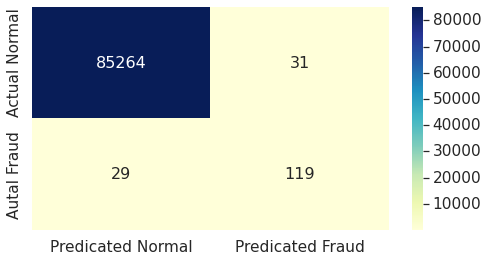

In [ ]:
# Confusion Matrix
xg_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
xg_cm=pd.DataFrame(xg_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(xg_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

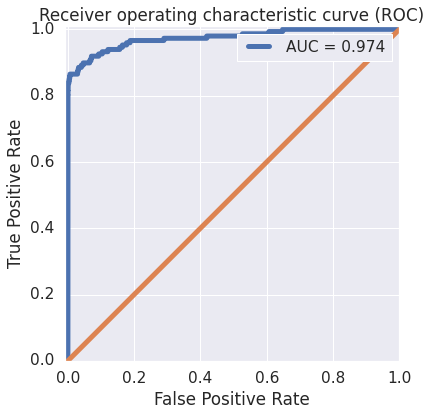

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- XG Boost Accuracy:  0.999
- Precision Score:  0.793
- Recall Score:  0.804
- F1 Score:  0.799
- ROC AUC :  0.974

In [ ]:
# Storing the result
result_2 = {"Model":["XG Boost with SMOTE"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_sm, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_2_df = pd.DataFrame(result_2)
result_2_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,XG Boost with SMOTE,1.0,0.9736


### ADASYN

In [45]:
import imblearn
from imblearn.over_sampling import ADASYN
from collections import Counter

# initialize ADASYN
ada = ADASYN(random_state=0)

#Run ADSYN on train data to handle data imbalance
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

# summarize the new class distribution

counter = Counter(y_train)
print("Before ADASYN", counter)

counter = Counter(y_train_ada)
print("After ADASYN", counter)

Before ADASYN Counter({0: 199020, 1: 344})
After ADASYN Counter({0: 199020, 1: 199013})


No handles with labels found to put in legend.


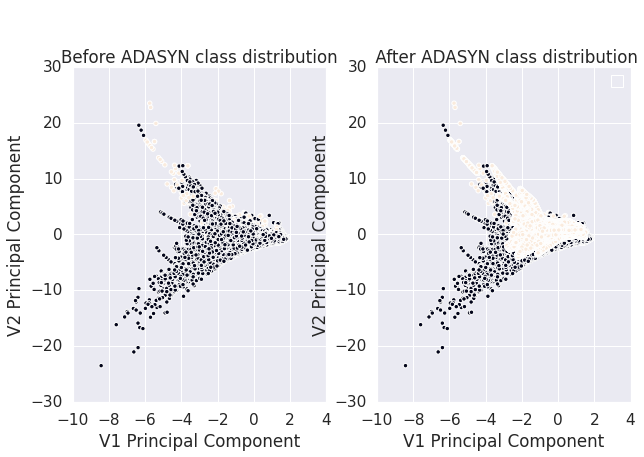

In [ ]:
# scatter plot of examples by class labels before and after ADASYN

plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train['V1'], X_train['V2'], c = y_train)
plt.xlabel('V1 Principal Component')
plt.ylabel('V2 Principal Component')
plt.title('Before ADASYN class distribution')
plt.subplot(1, 2, 2)
plt.scatter(X_train_ada['V1'], X_train_ada['V2'], c = y_train_ada)
plt.xlabel('V1 Principal Component')
plt.ylabel('V2 Principal Component')
plt.title('\n\n After ADASYN class distribution')
plt.legend(loc='upper right')
plt.show()

### Model 17: Logistic Regression with ADASYN

In [ ]:
# Logistic Regression parameters for K-fold cross vaidation
#perform cross validation 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
#perform hyperparameter tuning
c_space = [0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]
params = {'C': c_space}
lm_ada = LogisticRegression(max_iter=500)# Tried with default value first but did not converge, manually set max_iter to given value to work
lm_cv_ada = GridSearchCV(estimator=lm_ada, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

lm_cv_ada.fit(X_train_ada, y_train_ada)

#Best AUC
print("Best AUC: ", lm_cv_ada.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", lm_cv_ada.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best AUC:  0.9726285498551827
Best hyperparameters:  {'C': 5}


In [ ]:
# Passing the best parameteres
lm_tuned = lm_cv_ada.best_estimator_
lm_tuned.fit(X_train_ada,y_train_ada)

LogisticRegression(C=5, max_iter=500)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = lm_tuned.predict(X_train_ada)
y_train_pred_prob = lm_tuned.predict_proba(X_train_ada)[:, 1]

print("Train AUC:    \t", round(roc_auc_score(y_train_ada, y_train_pred_prob),4))

#print the optimum value of hyperparameters

print("Best hyperparameters: ", lm_cv_ada.best_params_)

# evaluation on test data
y_test_pred = lm_tuned.predict(X_test)
y_test_pred_prob = lm_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Train AUC:    	 0.9727
Best hyperparameters:  {'C': 5}
Test AUC:    	 0.9688


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Logistic Regression Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.90      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.96     85443

Confusion matrix:
 [[78606  6689]
 [   15   133]]
Logistic Regression Accuracy:  0.922
Precision Score:  0.019
Recall Score:  0.899
F1 Score:  0.038
ROC AUC :  0.969


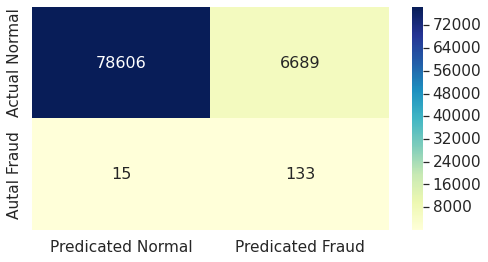

In [ ]:
# Confusion Matrix
log_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
log_cm=pd.DataFrame(log_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(log_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

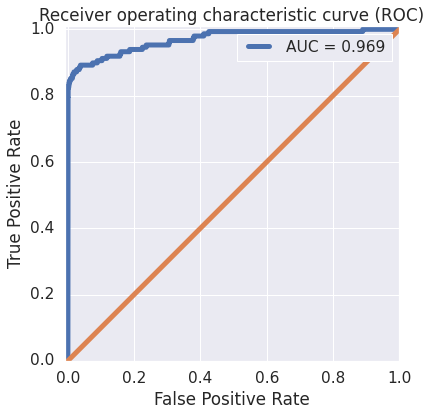

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Logistic Regression Accuracy:  0.922
- Precision Score:  0.019
- Recall Score:  0.899
- F1 Score:  0.038
- ROC AUC :  0.969

In [ ]:
#Storing the result
result_2 = {"Model":["Logistic Regression With ADASYN"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ada, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_2_df = result_2_df.append(pd.DataFrame(result_2), ignore_index=True)
result_2_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,XG Boost with SMOTE,1.0000,0.9736
1,Logistic Regression With ADASYN,0.9727,0.9688


### Model 18 : Decision Tree with ADASYN

In [ ]:
# Decision Tree parameters for K-fold cross vaidation
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3,5,8]}

dt_ada = DecisionTreeClassifier(random_state=1)
dt_cv_ada = GridSearchCV(estimator=dt_ada, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv_ada.fit(X_train_ada, y_train_ada)

#Best AUC
print("Best AUC: ", dt_cv_ada.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv_ada.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best AUC:  0.9863461742940836
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100}


In [ ]:
# Passing the best parameteres
dt_tuned = dt_cv_ada.best_estimator_
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=100, random_state=1)

In [ ]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = dt_tuned.predict(X_train_ada)
y_train_pred_prob = dt_tuned.predict_proba(X_train_ada)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_ada, y_train_pred_prob),4))

#print the optimum value of hyperparameters

print("Best hyperparameters: ", dt_cv_ada.best_params_)

# evaluation on test data
y_test_pred = dt_tuned.predict(X_test)
y_test_pred_prob = dt_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Train AUC:    	 0.813
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100}
Test AUC:    	 0.9253


In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Decision Tree Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.70      0.66      0.68       148

    accuracy                           1.00     85443
   macro avg       0.85      0.83      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85252    43]
 [   50    98]]
Decision Tree Accuracy:  0.999
Precision Score:  0.695
Recall Score:  0.662
F1 Score:  0.678
ROC AUC :  0.925


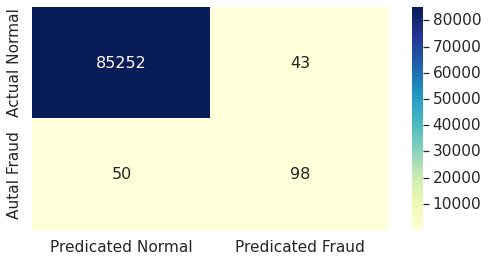

In [ ]:
# Confusion Matrix
dt_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
dt_cm=pd.DataFrame(dt_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(dt_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

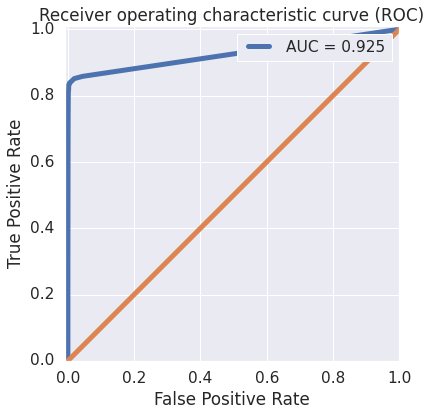

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Decision Tree Accuracy:  0.999
- Precision Score:  0.695
- Recall Score:  0.662
- F1 Score:  0.678
- ROC AUC :  0.925

In [ ]:
#Storing the result
result_2 = {"Model":["Decision Tree with ADASYN"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ada, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_2_df = result_2_df.append(pd.DataFrame(result_2), ignore_index=True)
result_2_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,XG Boost with SMOTE,1.0000,0.9736
1,Logistic Regression With ADASYN,0.9727,0.9688
2,Decision Tree with ADASYN,0.8130,0.9253


### Model 19: Random Forest with ADASYN

In [46]:
# Random Forest parameters for K-fold cross vaidation
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3,5,8], 'n_estimators' : [50,80]}

rf_ada = RandomForestClassifier(n_jobs = -1)
rf_cv_ada = GridSearchCV(estimator=rf_ada, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv_ada.fit(X_train_ada, y_train_ada)

#Best AUC
print("Best AUC: ", rf_cv_ada.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv_ada.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best AUC:  0.9985497498770096
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 80}


In [47]:
# Passing the best parameteres
rf_tuned = rf_cv_ada.best_estimator_
rf_tuned.fit(X_train_ada,y_train_ada)

RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=80,
                       n_jobs=-1)

In [48]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = rf_tuned.predict(X_train_ada)
y_train_pred_prob = rf_tuned.predict_proba(X_train_ada)[:, 1]

print("Train AUC:    \t", round(roc_auc_score(y_train_ada, y_train_pred_prob),4))

#print the optimum value of hyperparameters

print("Best hyperparameters: ", rf_cv_ada.best_params_)

# evaluation on test data
y_test_pred = rf_tuned.predict(X_test)
y_test_pred_prob = rf_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Train AUC:    	 0.9983
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 80}
Test AUC:    	 0.9699


In [49]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Random Forest Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.86      0.13       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83561  1734]
 [   21   127]]
Random Forest Accuracy:  0.979
Precision Score:  0.068
Recall Score:  0.858
F1 Score:  0.126
ROC AUC :  0.97


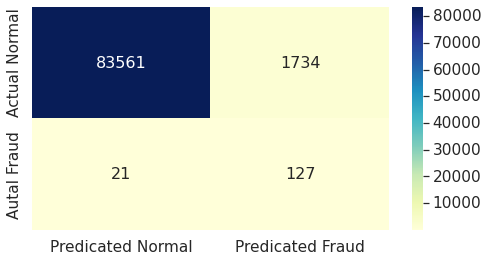

In [50]:
# Confusion Matrix
rf_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
rf_cm=pd.DataFrame(rf_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

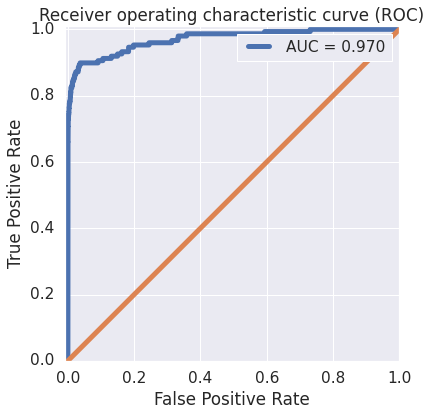

In [51]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Random Forest Accuracy:  0.979
- Precision Score:  0.068
- Recall Score:  0.858
- F1 Score:  0.126
- ROC AUC :  0.97

In [52]:
#Storing the result
result_3 = {"Model":["Random Forest with ADASYN"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ada, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_3_df =  pd.DataFrame(result_3)
result_3_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Random Forest with ADASYN,0.9983,0.9699


### Model 20: XG Boost with ADASYN

In [56]:
# XG Boost parameters for K-fold cross vaidation
#perform cross validation
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'subsample': [0.3, 0.5, 0.7],'max_depth':[5,8], 'n_estimators': [50]}

xg_ada = xgb.XGBClassifier(n_jobs = -1)
xg_cv_ada = GridSearchCV(estimator=xg_ada, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
xg_cv_ada.fit(X_train_ada, y_train_ada)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=XGBClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
                         'max_depth': [5, 8], 'n_estimators': [50],
                         'subsample': [0.3, 0.5, 0.7]},
             scoring='roc_auc', verbose=1)

In [57]:
#Best AUC
print("Best AUC: ", xg_cv_ada.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", xg_cv_ada.best_params_)

Best AUC:  0.9999876572635964
Best hyperparameters:  {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.7}


In [58]:
# Passing the best parameteres
xg_tuned = xg_cv_ada.best_estimator_
xg_tuned.fit(X_train_ada,y_train_ada)

XGBClassifier(learning_rate=0.5, max_depth=8, n_estimators=50, n_jobs=-1,
              subsample=0.7)

In [59]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred = xg_tuned.predict(X_train_ada)
y_train_pred_prob = xg_tuned.predict_proba(X_train_ada)[:, 1]

print("Train AUC:    \t", round(roc_auc_score(y_train_ada, y_train_pred_prob),4))

Train AUC:    	 1.0


In [60]:
#print the optimum value of hyperparameters

print("Best hyperparameters: ", xg_cv_ada.best_params_)

# evaluation on test data
y_test_pred= xg_tuned.predict(X_test)
y_test_pred_prob = xg_tuned.predict_proba(X_test)[:, 1]

print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Best hyperparameters:  {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.7}
Test AUC:    	 0.9641


In [61]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("XG Boost Accuracy: ",round(accuracy_score(y_test, y_test_pred),3))
print("Precision Score: ",round(precision_score(y_test,y_test_pred),3))
print("Recall Score: ",round(recall_score(y_test,y_test_pred),3))
print("F1 Score: ",round(f1_score(y_test,y_test_pred),3))
print('ROC AUC : ', round(roc_auc_score(y_test, y_test_pred_prob),3))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.80      0.77       148

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85253    42]
 [   29   119]]
XG Boost Accuracy:  0.999
Precision Score:  0.739
Recall Score:  0.804
F1 Score:  0.77
ROC AUC :  0.964


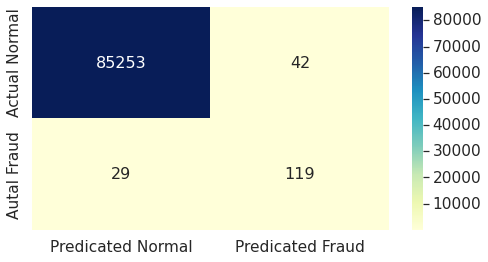

In [62]:
# Confusion Matrix
xg_cm= confusion_matrix(y_true = y_test, y_pred = y_test_pred)
xg_cm=pd.DataFrame(xg_cm,['Actual Normal','Autal Fraud'],['Predicated Normal','Predicated Fraud'])
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(xg_cm,annot=True,fmt='g',annot_kws={"size":16},cmap='YlGnBu')
plt.show()

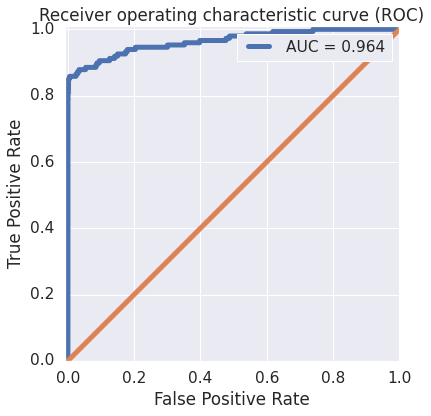

In [63]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- XG Boost Accuracy:  0.999
- Precision Score:  0.739
- Recall Score:  0.804
- F1 Score:  0.77
- ROC AUC :  0.964

In [64]:
#Storing the result
result_3 = {"Model":["XG Boost with ADASYN"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ada, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_3_df = result_3_df.append(pd.DataFrame(result_3), ignore_index=True)
result_3_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Random Forest with ADASYN,0.9983,0.9699
1,XG Boost with ADASYN,1.0000,0.9641


### Finalizing the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [67]:
# perform the best oversampling method on X_train & y_train

clf =  xgb.XGBClassifier(learning_rate=0.5, subsample=0.7, max_depth=8, n_estimators=50)  #initialise the model with optimum hyperparameters
clf.fit(X_train_sm, y_train_sm) # fit on the balanced dataset


XGBClassifier(learning_rate=0.5, max_depth=8, n_estimators=50, subsample=0.7)

In [68]:
# evaluation on train data
y_train_pred_prob = clf.predict(X_train_sm)
print("Train AUC:    \t", round(roc_auc_score(y_train_sm, y_train_pred_prob),4))


Train AUC:    	 1.0


In [69]:
#print the evaluation score on the X_test by choosing the best evaluation metric
y_test_pred_prob = clf.predict(X_test)
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),2))

Test AUC:    	 0.9


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


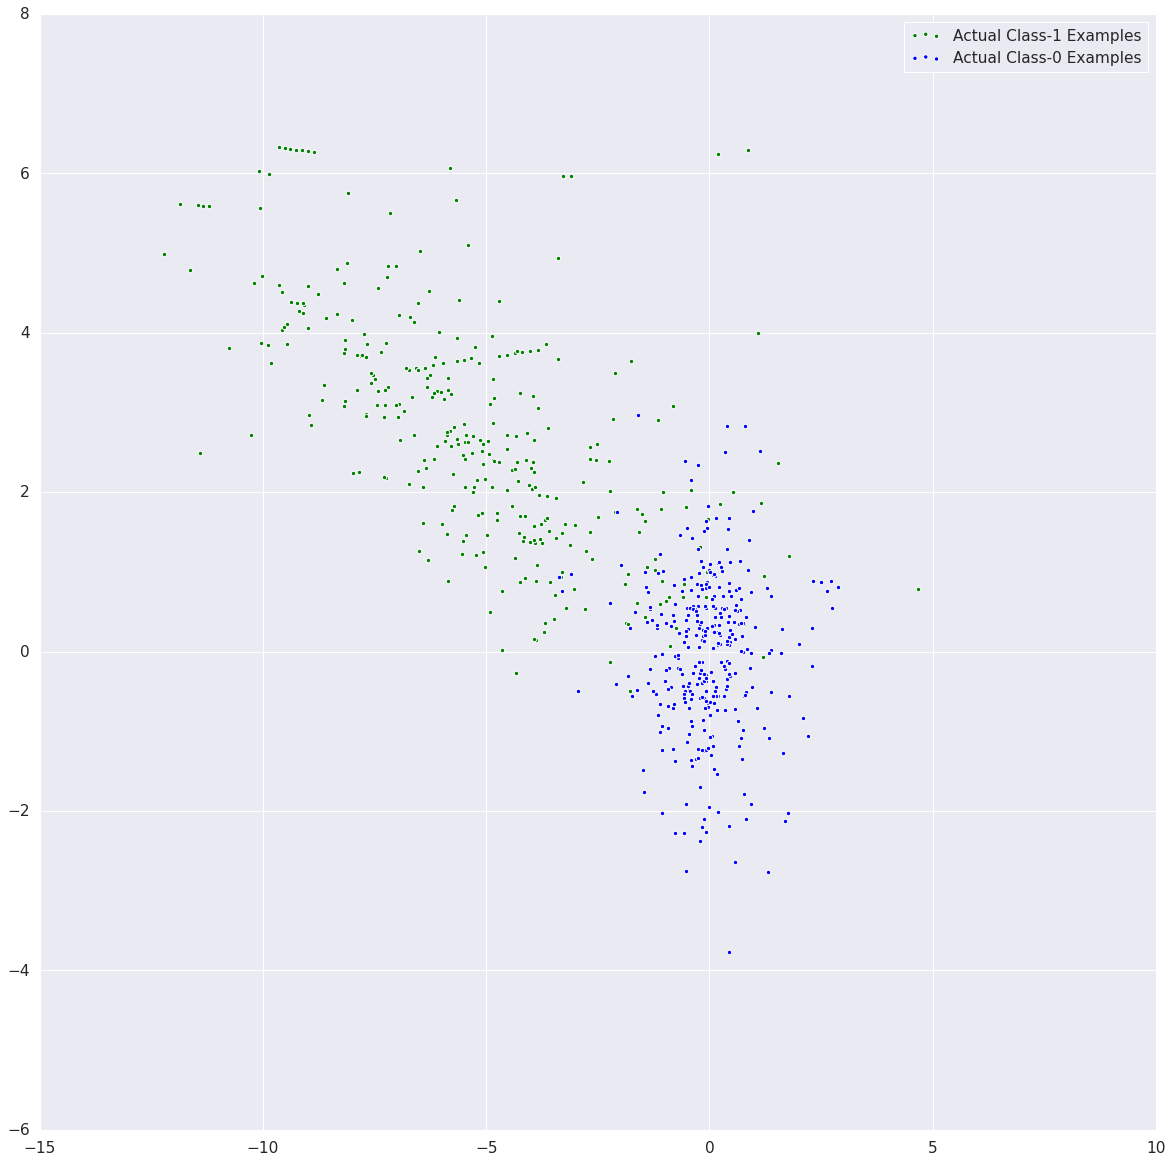

In [79]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
color1="Green"
color2="Blue"
plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples',c=color1)
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples',c=color2)
plt.legend()
plt.show()

Feature: 0, Score: 0.01027
Feature: 1, Score: 0.00491
Feature: 2, Score: 0.01370
Feature: 3, Score: 0.06114
Feature: 4, Score: 0.00831
Feature: 5, Score: 0.01920
Feature: 6, Score: 0.01055
Feature: 7, Score: 0.02987
Feature: 8, Score: 0.00558
Feature: 9, Score: 0.02496
Feature: 10, Score: 0.01153
Feature: 11, Score: 0.01602
Feature: 12, Score: 0.01200
Feature: 13, Score: 0.64415
Feature: 14, Score: 0.00534
Feature: 15, Score: 0.00584
Feature: 16, Score: 0.01466
Feature: 17, Score: 0.01472
Feature: 18, Score: 0.00641
Feature: 19, Score: 0.00545
Feature: 20, Score: 0.00872
Feature: 21, Score: 0.00807
Feature: 22, Score: 0.01172
Feature: 23, Score: 0.00832
Feature: 24, Score: 0.01567
Feature: 25, Score: 0.00736
Feature: 26, Score: 0.00429
Feature: 27, Score: 0.00435
Feature: 28, Score: 0.00692


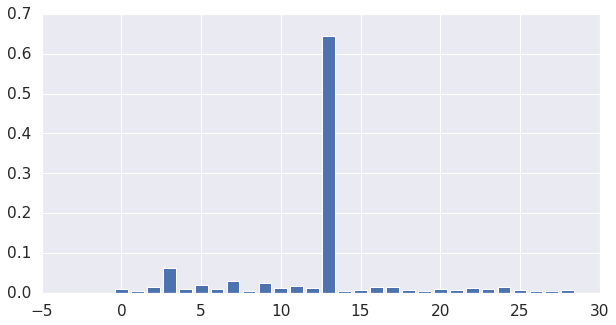

In [80]:
# Listing all the features with their importance and creating a bar plot

importance = clf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [95]:
print('Test auc =', metrics.roc_auc_score(y_test, y_test_pred_prob))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)


Test auc = 0.9018453047689814
1


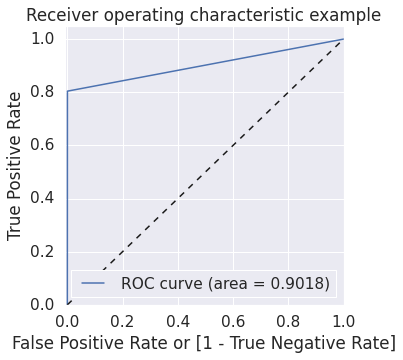

In [96]:
#### Let us print ROC Curve, and classification report on this final model

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_prob, drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_test_pred_prob,)

plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [98]:
# Impoting metrics module
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_test_pred = pd.Series(y_test_pred_prob).map(lambda x: 1 if x > 0.367146 else 0)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Metrics \n", confusion, '\n')

# classification_report
print("Classification Report\n", classification_report(y_test, y_test_pred))


Confusion Metrics 
 [[85264    31]
 [   29   119]] 

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.80      0.80       148

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



## Conclusion 

#### Evaluation Metrics: 
We are going with AUC-ROC as evaluation metric because it is independent of threshold, whereas other metrics score are dependent on threshold.
#### Model Building on Balanced Dataset:
- We can depict from different model that Random Forest classifier and XG Boost have higher auc score than logistic regression and decision tree. 
- But Random forest consume lot of resources and taking more time for training the dataset, whereas logistic regression is taking less amount of time and perform well.
- Also from different class imbalancing method we have observed that SMOTE is performing well.
- XG Boost is as best model with test ROC-AUC score - 0.901
- For balanced dataset top three variable are as: Top variable is 14th variable with score 0.64415, 2nd top variable is 4th variable with score 0.06114 and 3rd top variable is 8th variable with score  0.02987